In [27]:
# Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

## Loading the Data

In [28]:
# Loading the Data
df = pd.read_csv('train (1).csv', index_col=False,delimiter=';')

test = pd.read_csv("test (1).csv")

print("Shape :",df.shape)
print("Describe :",df.describe())
print("Null_values :",df.isnull().sum())
df.head(5)

Shape : (4521, 17)
Describe :                age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


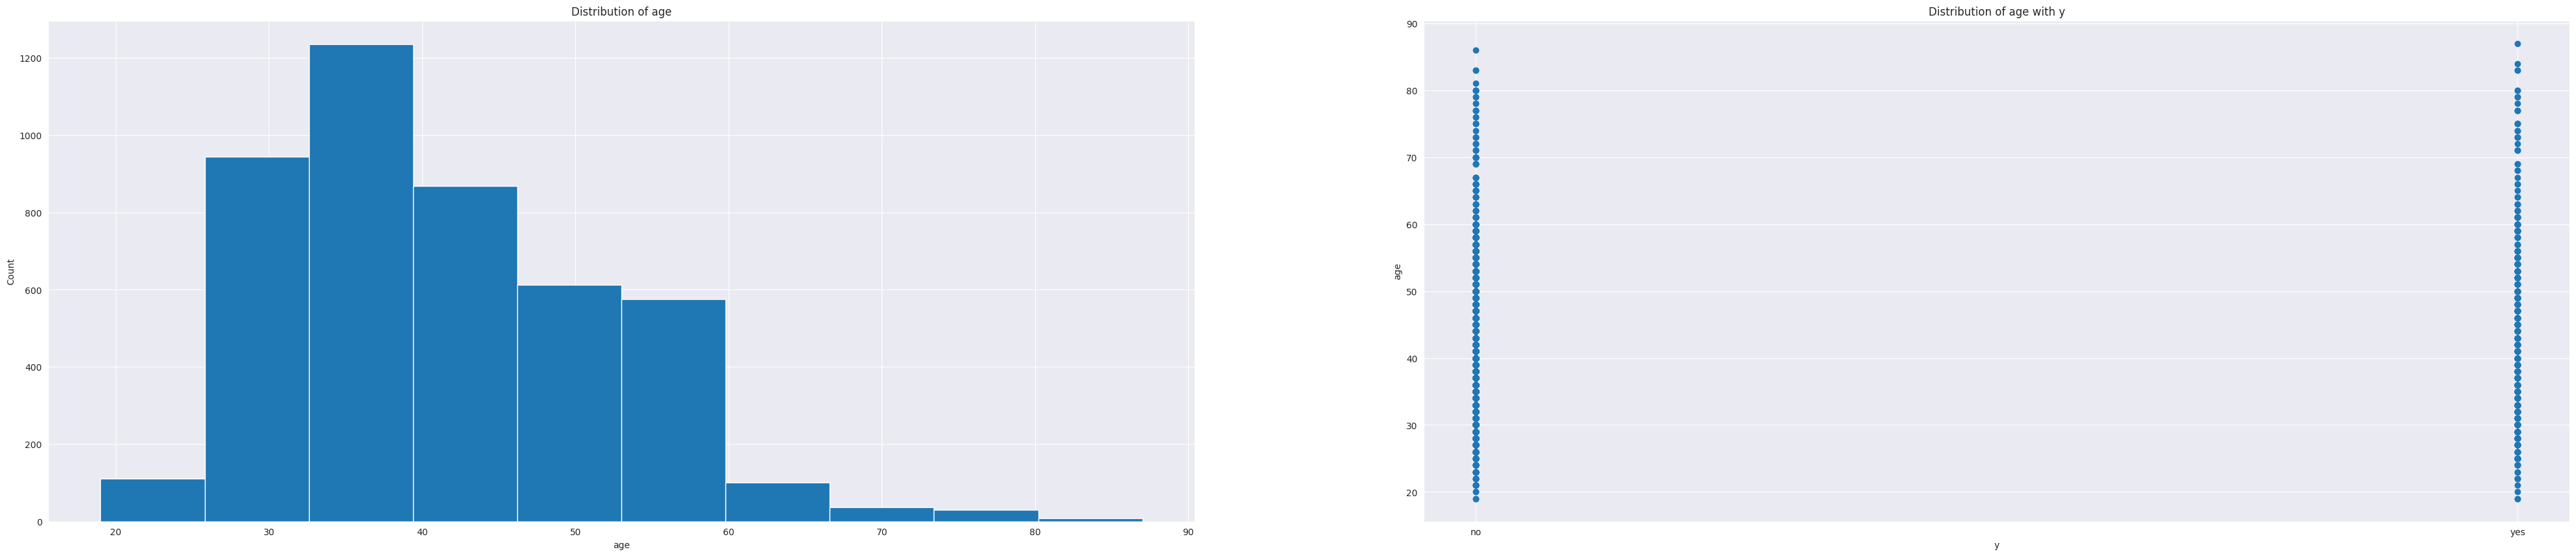

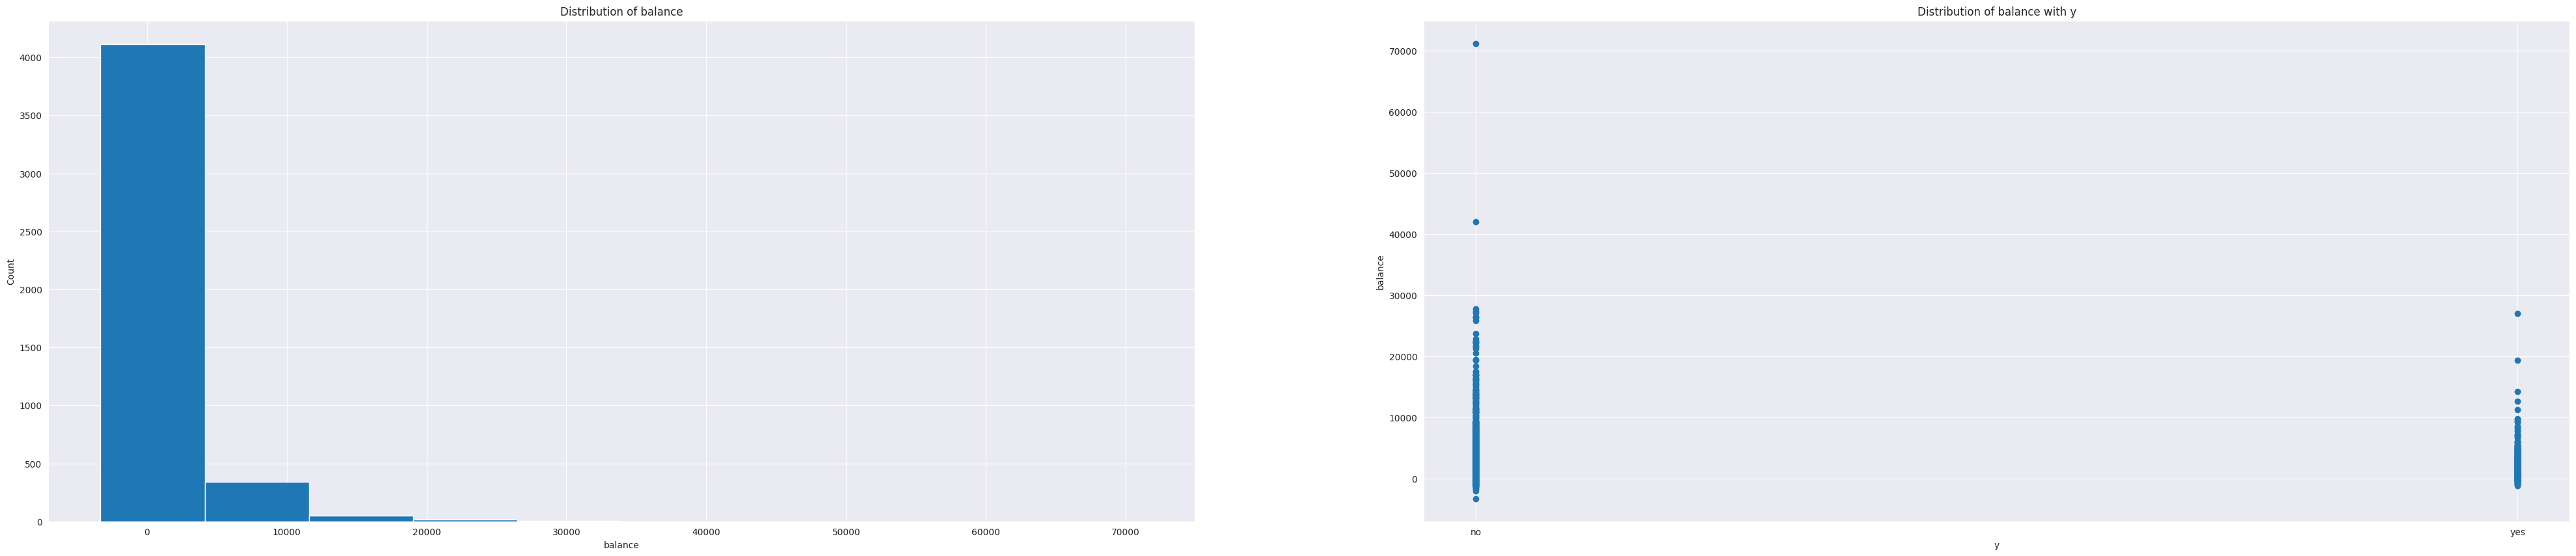

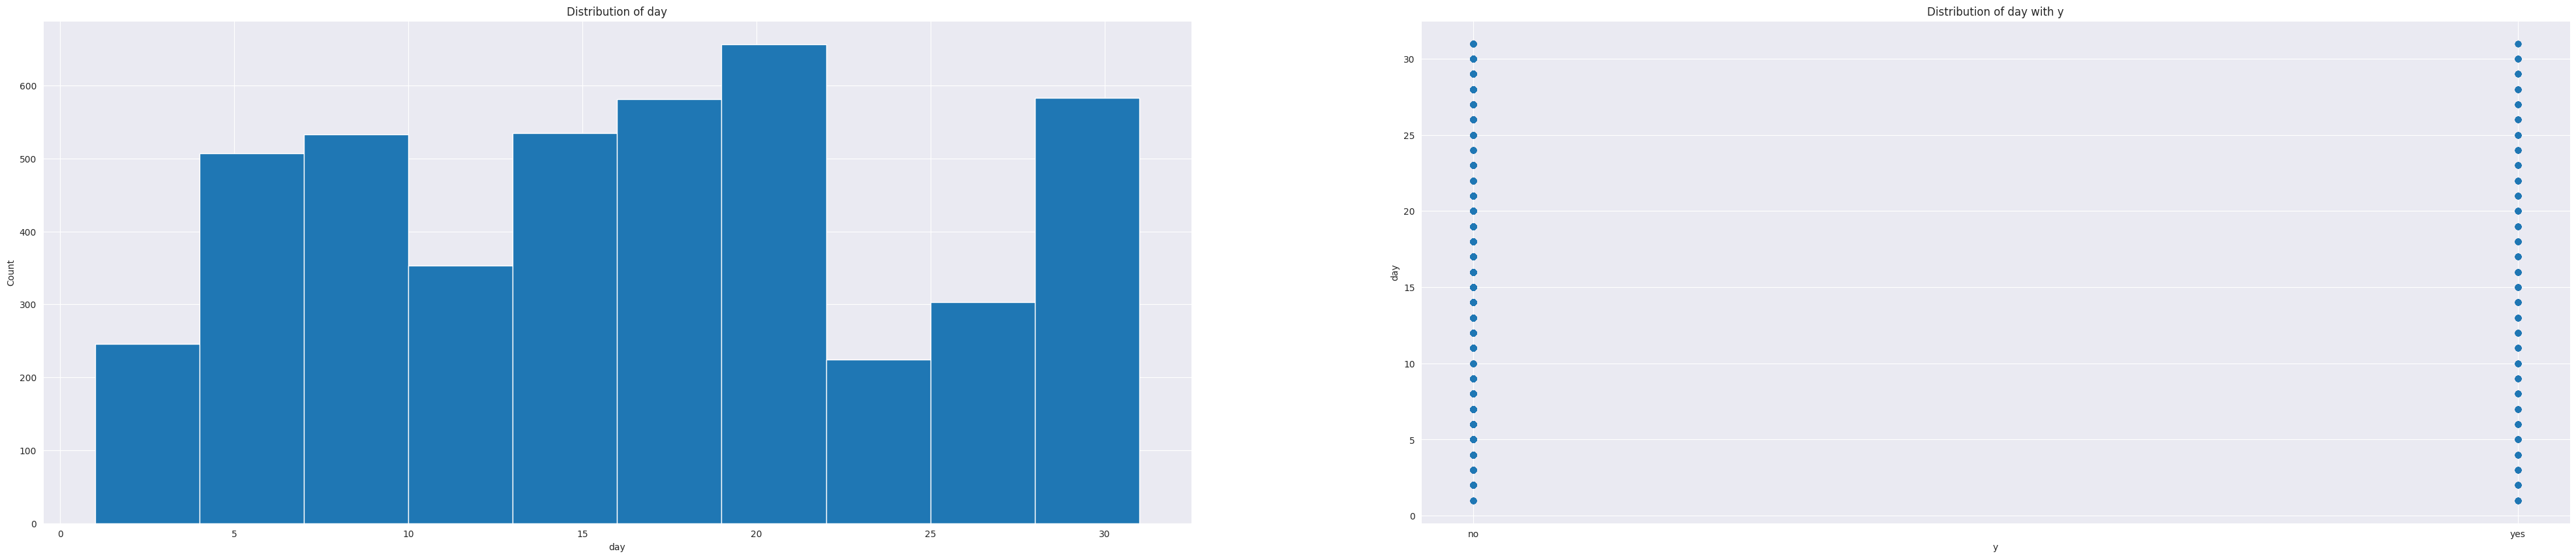

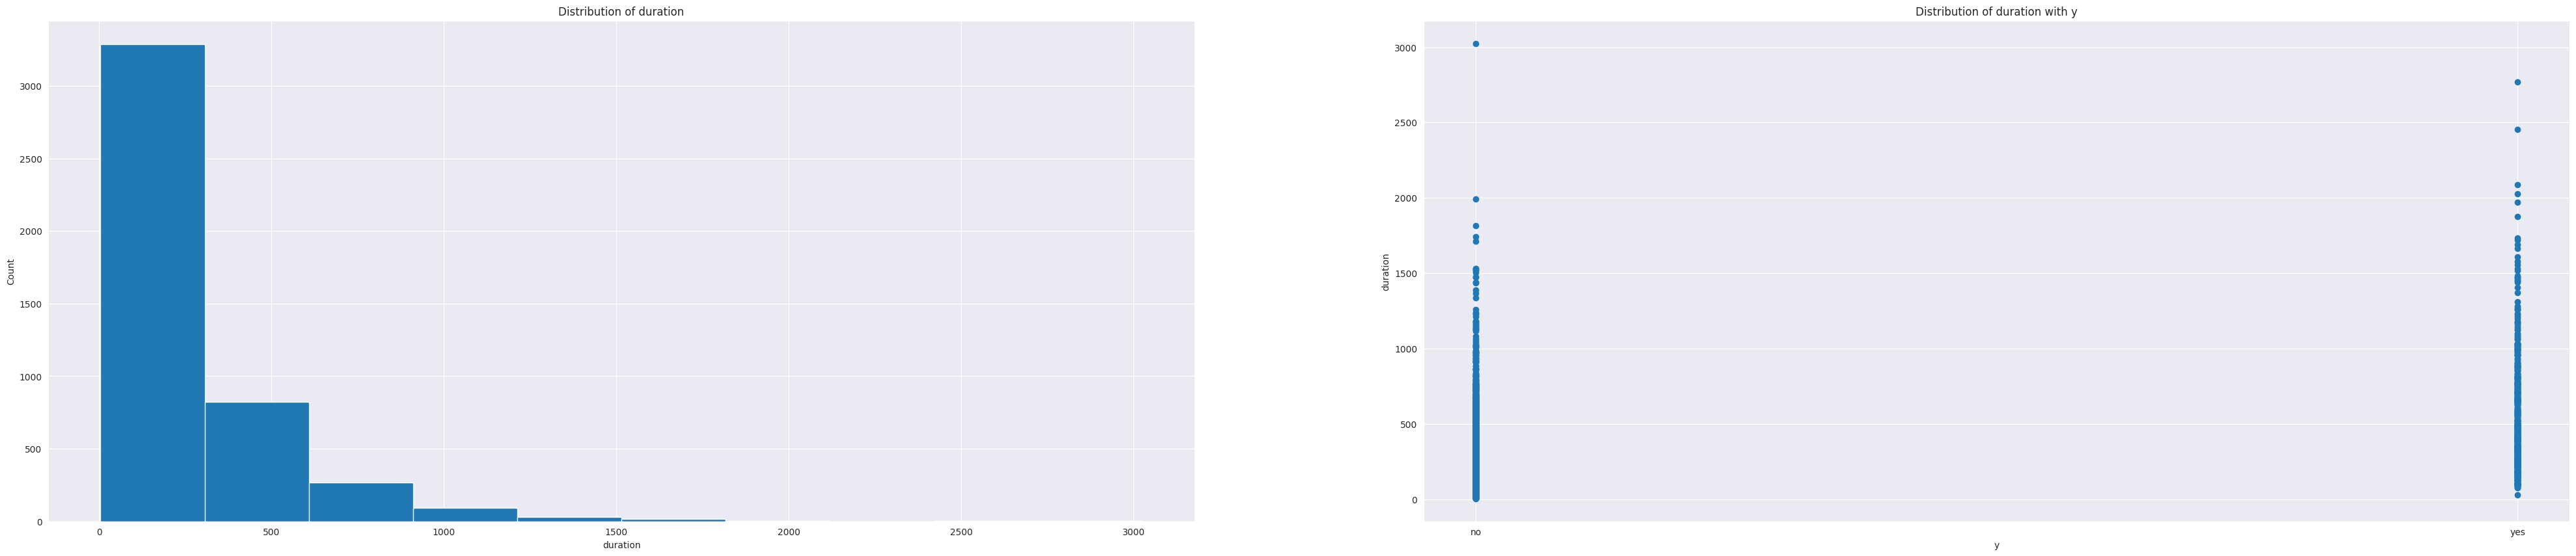

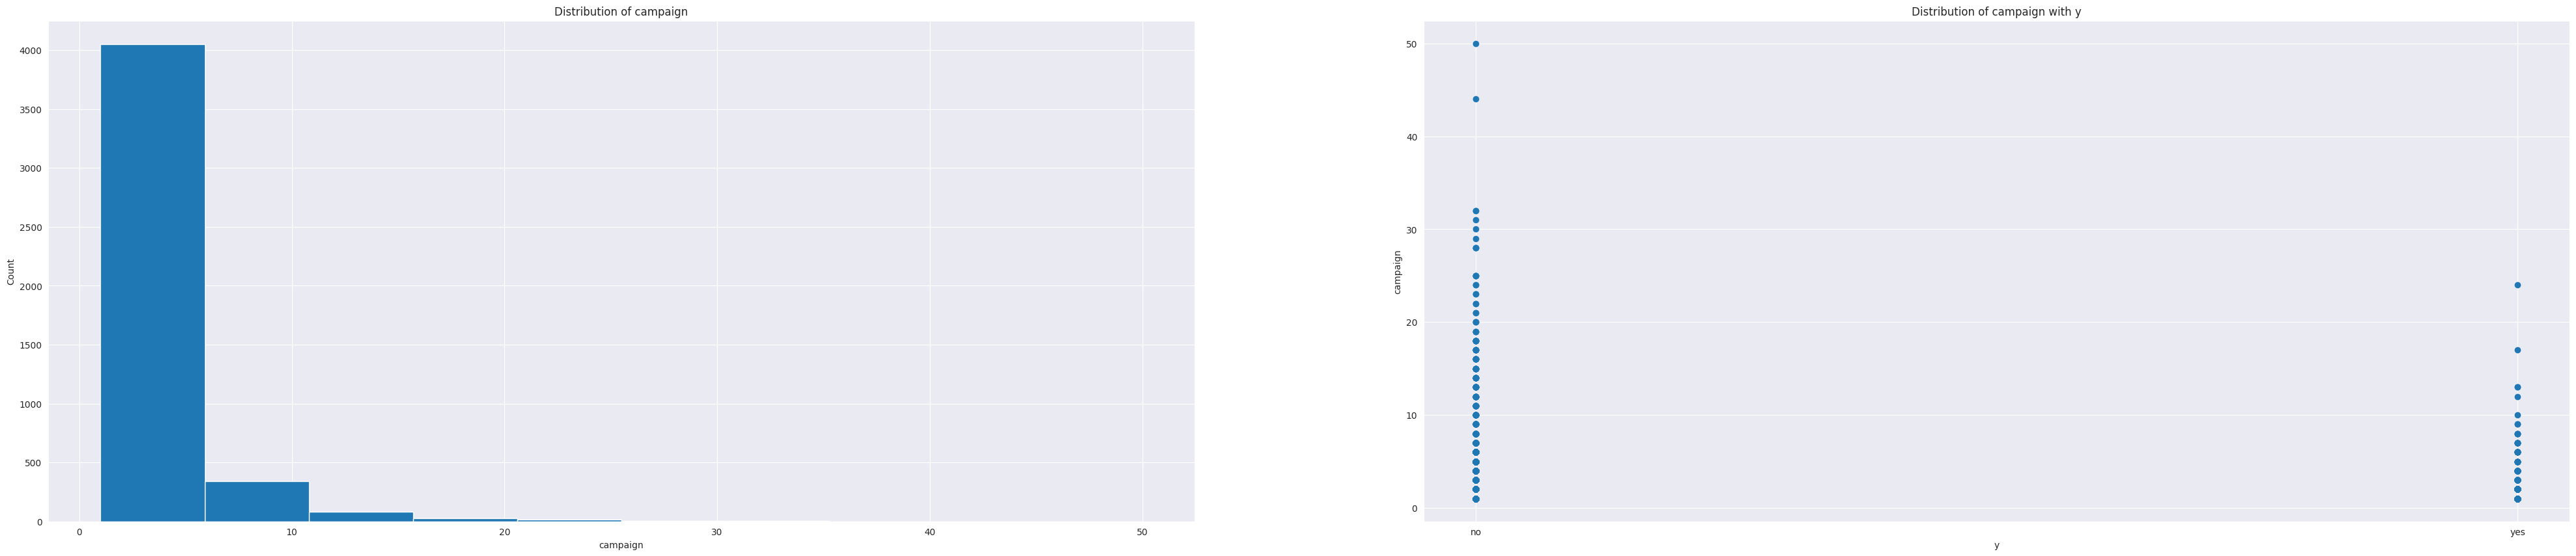

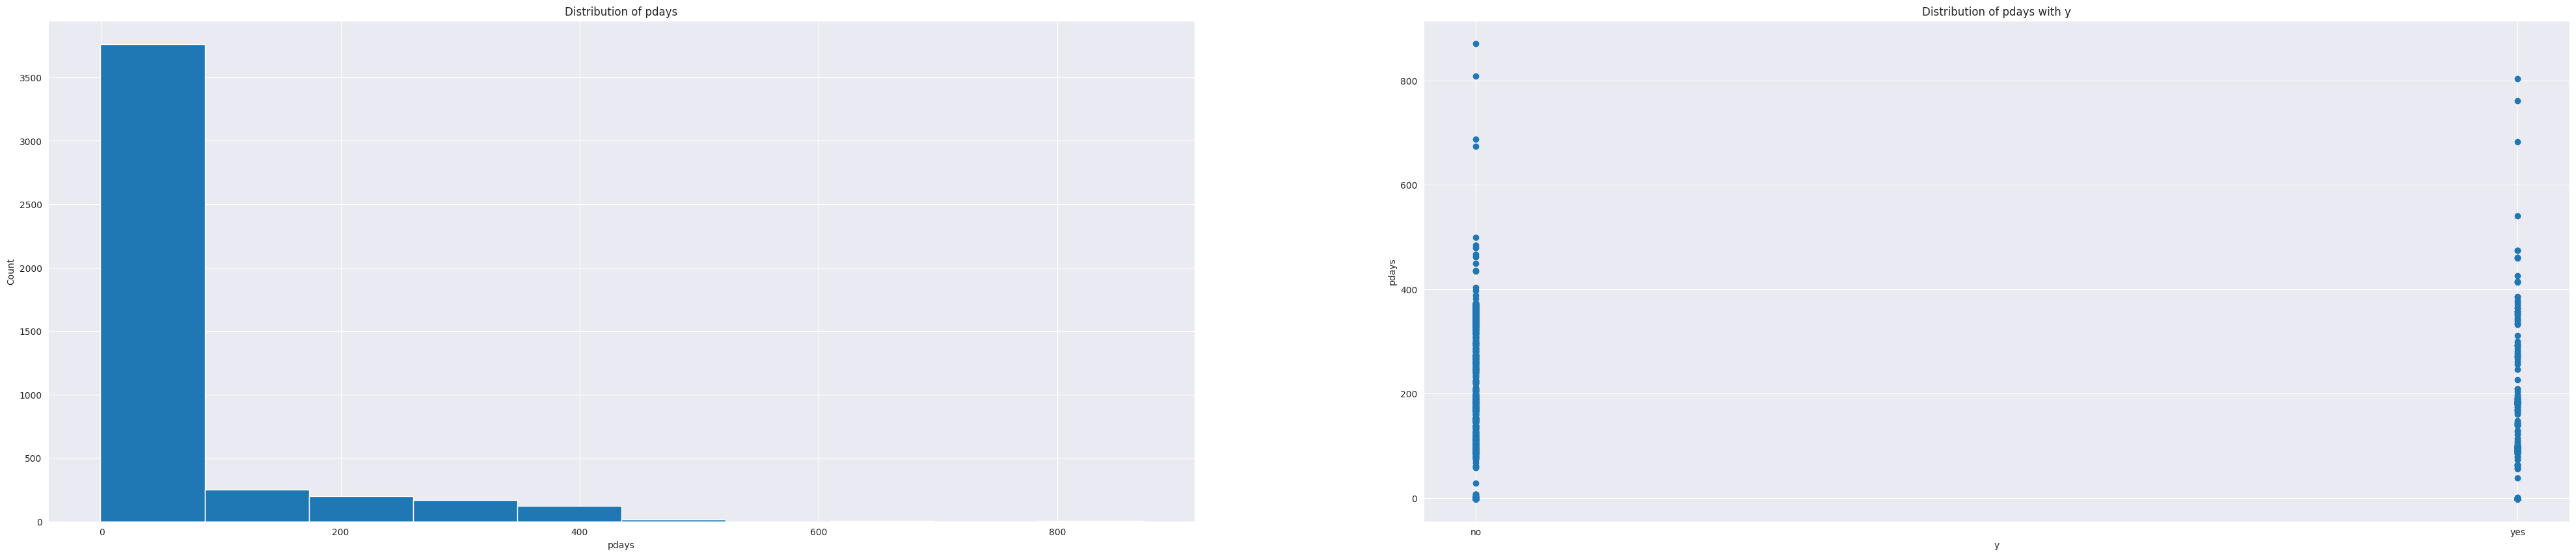

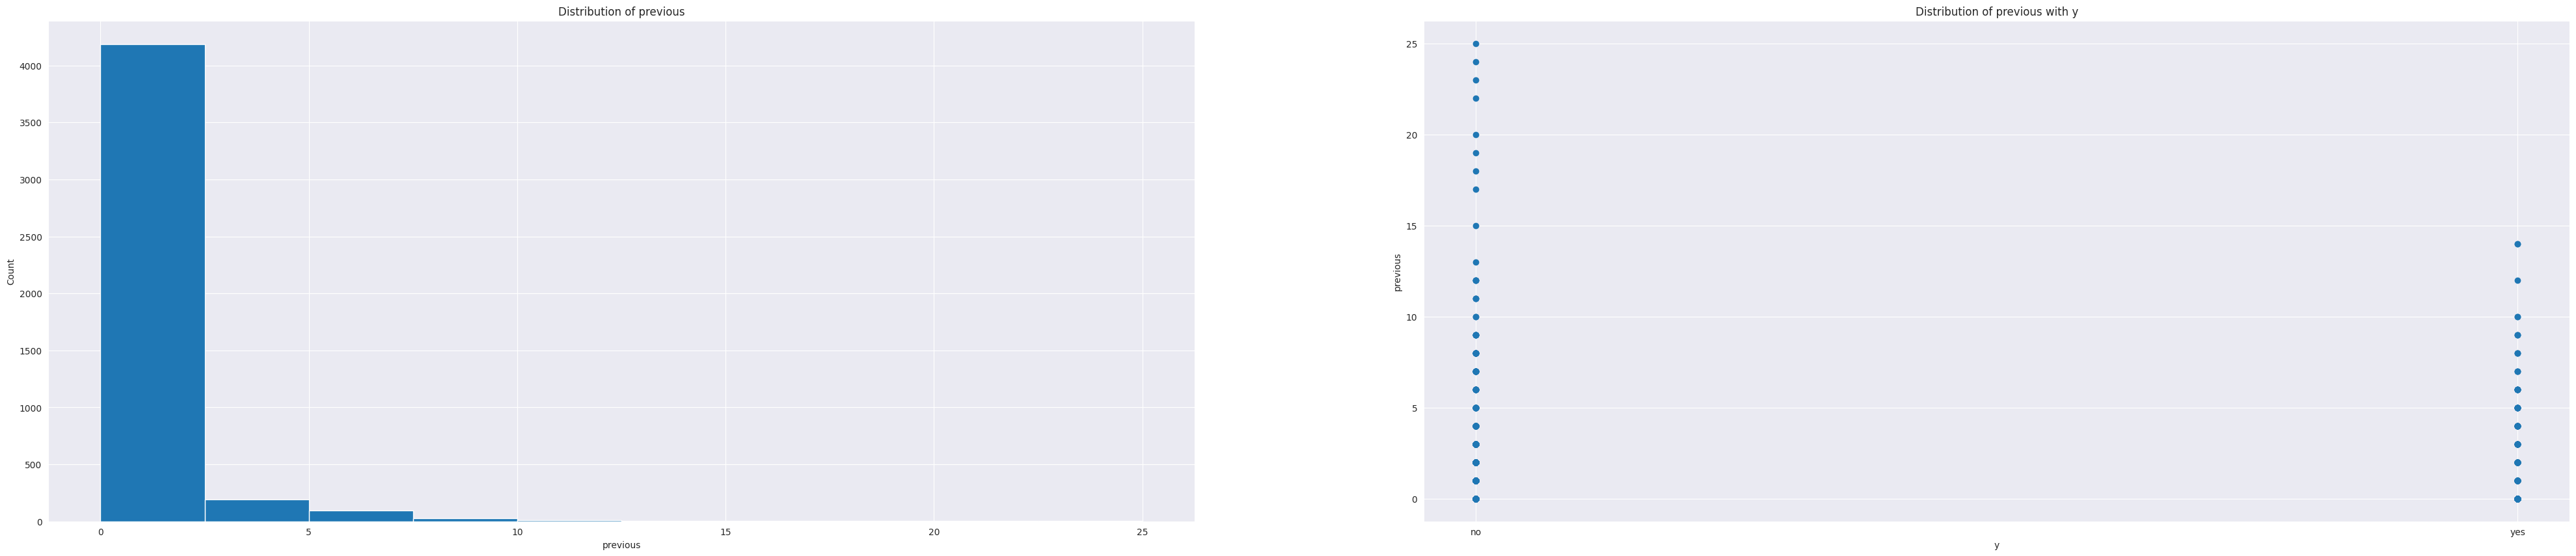

In [29]:
# Analysing the data

columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', ]
for col in columns:
    plt.figure(figsize=(50,10))
    right = plt.subplot(1,2,1)
    plt.hist(df[col])
    right.set_ylabel("Count")
    right.set_xlabel(col)
    right.set_title(f"Distribution of {col}")
    left = plt.subplot(1,2,2)
    plt.scatter(df["y"],df[col])
    left.set_ylabel(col)
    left.set_xlabel("y")
    left.set_title(f"Distribution of {col} with y")
    plt.show()

## Removing Outliers

### Checkpoint-1


In [30]:
# Analysing the data
df_outliers = df.copy()

# Identify columns with numeric data
numeric_cols = df_outliers.select_dtypes(include='number').columns

# Calculate quartiles only for numeric columns
Q1 = df_outliers[numeric_cols].quantile(0.25)
Q3 = df_outliers[numeric_cols].quantile(0.75)

# Calculate IQR for numeric columns
IQR = Q3 - Q1

# Define bounds for outliers (for numeric columns)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in numeric columns
outliers = df_outliers[numeric_cols][
    (df_outliers[numeric_cols] < lower_bound) | (df_outliers[numeric_cols] > upper_bound)
].dropna(how='all')

# Remove outliers (considering only indices from numeric columns)
df_without_outliers = df_outliers.drop(outliers.index)

print(df_without_outliers.shape)
df_without_outliers.head()

(2803, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no


In [31]:
# Reseting the index
df_without_outliers=df_without_outliers.reset_index(drop=True)

## Feature Selection

In [32]:
# Converting Categorical to numerical
df_without_outliers["marital"]=df_without_outliers["marital"].map({'single':0, 'married':1, 'divorced':2})
df_without_outliers["default"]=df_without_outliers["default"].map({'no':0, 'yes':1})
df_without_outliers["housing"]=df_without_outliers["housing"].map({'no':0, 'yes':1})
df_without_outliers["loan"]=df_without_outliers["loan"].map({'no':0, 'yes':1})
df_without_outliers["y"]=df_without_outliers["y"].map({'no':0, 'yes':1})

df_without_outliers.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,1,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,30,management,1,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
2,59,blue-collar,1,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0
3,39,technician,1,secondary,0,147,1,0,cellular,6,may,151,2,-1,0,unknown,0
4,41,entrepreneur,1,tertiary,0,221,1,0,unknown,14,may,57,2,-1,0,unknown,0


In [33]:
# Calculating 'unknown' values in poutcome
df_without_outliers['poutcome'].replace({'unknown': None},inplace =True, regex= True)
print(df_without_outliers['poutcome'].unique())

df_without_outliers.head()


[None]


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,1,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,None,0
1,30,management,1,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,None,0
2,59,blue-collar,1,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,None,0
3,39,technician,1,secondary,0,147,1,0,cellular,6,may,151,2,-1,0,None,0
4,41,entrepreneur,1,tertiary,0,221,1,0,unknown,14,may,57,2,-1,0,None,0


In [34]:
# As poutcome column has same values we can drop this column
df_without_outliers.drop("poutcome", inplace = True, axis = 1)

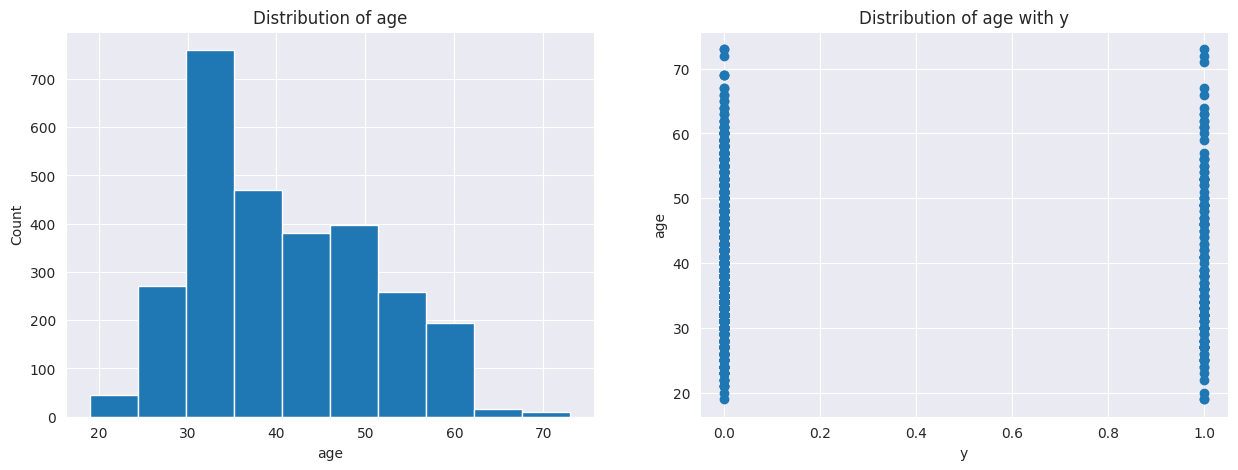

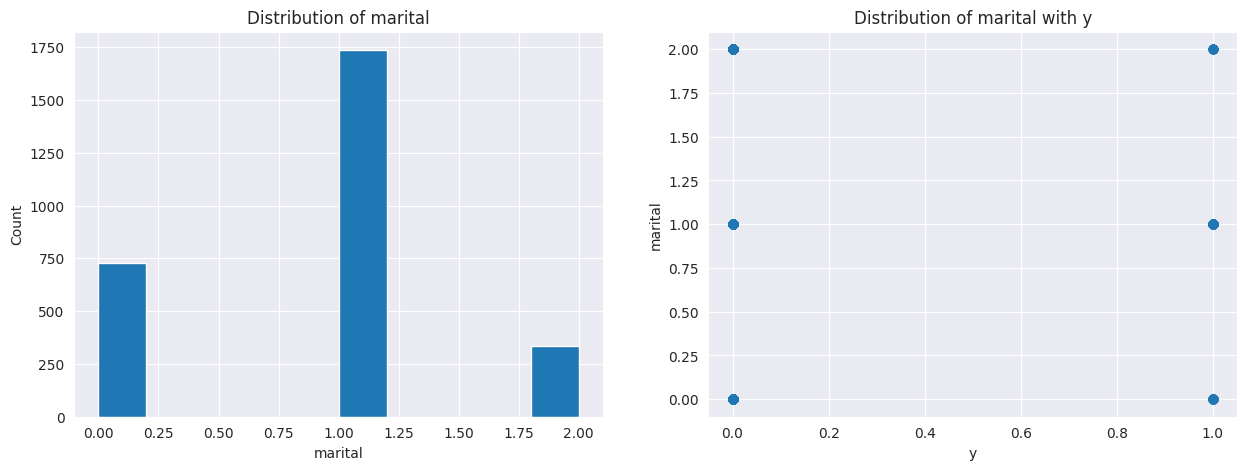

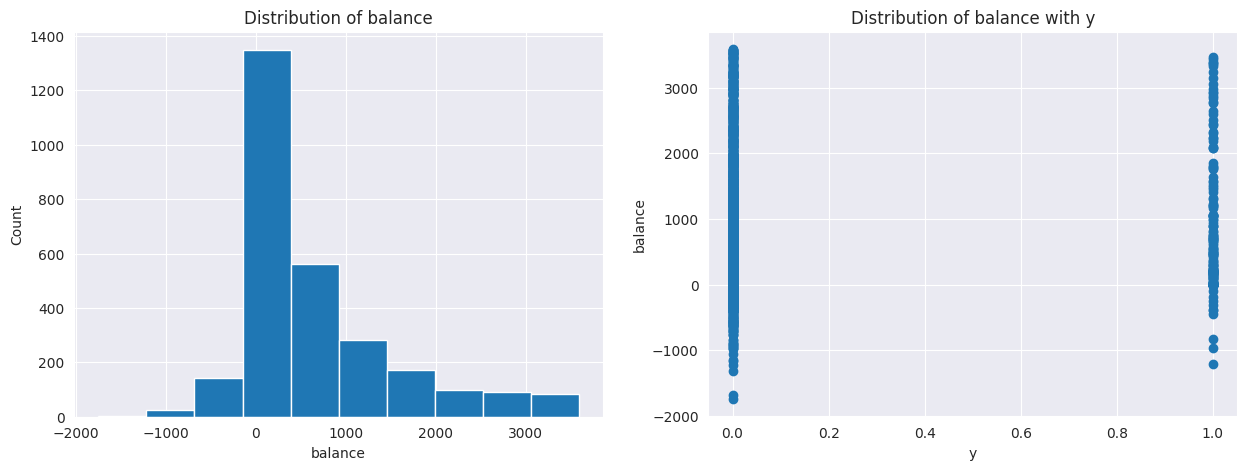

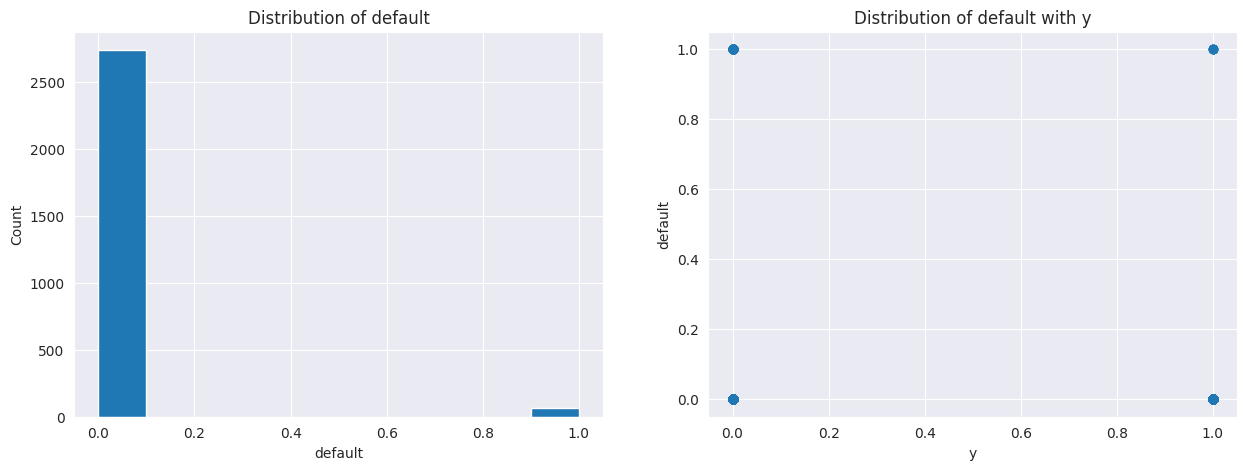

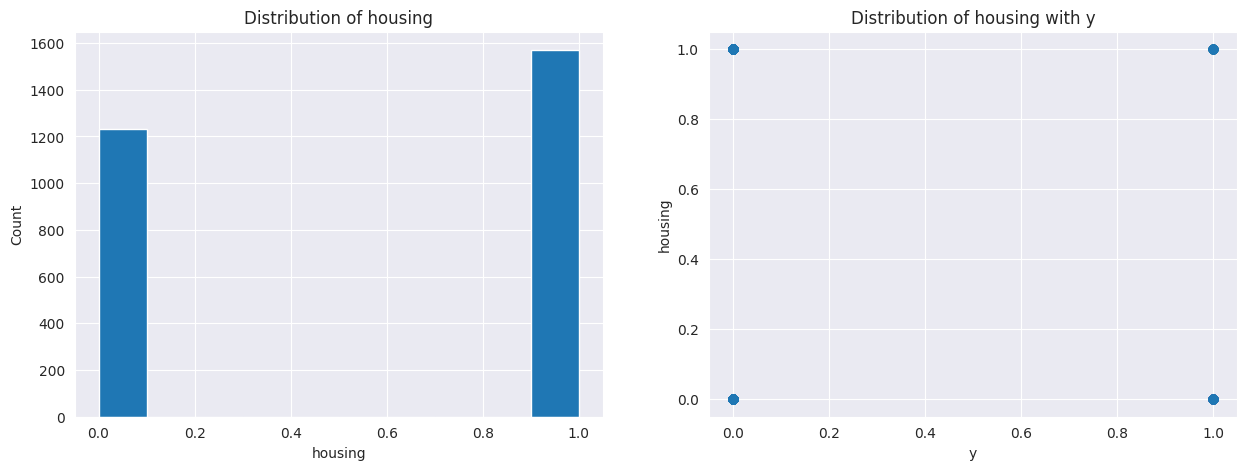

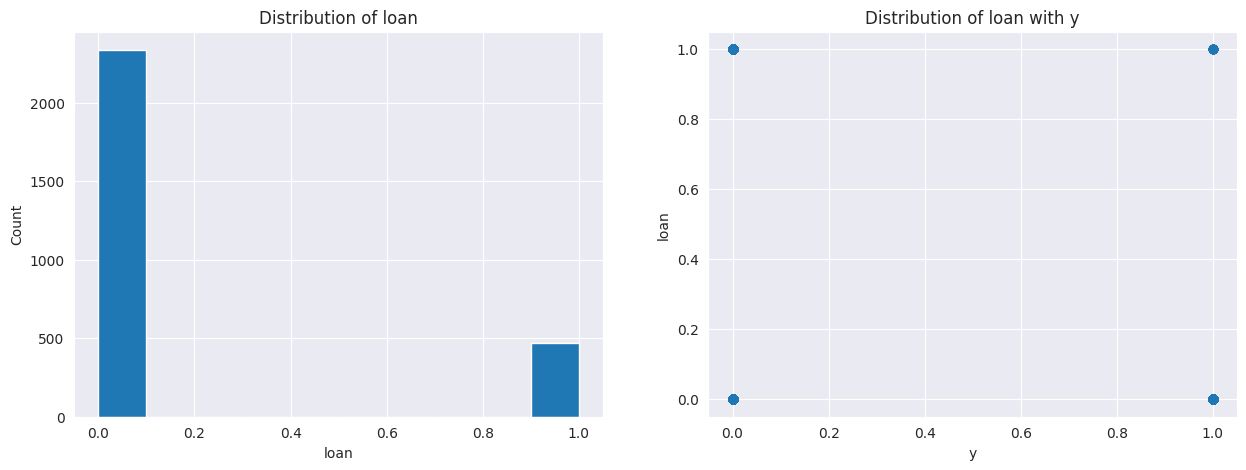

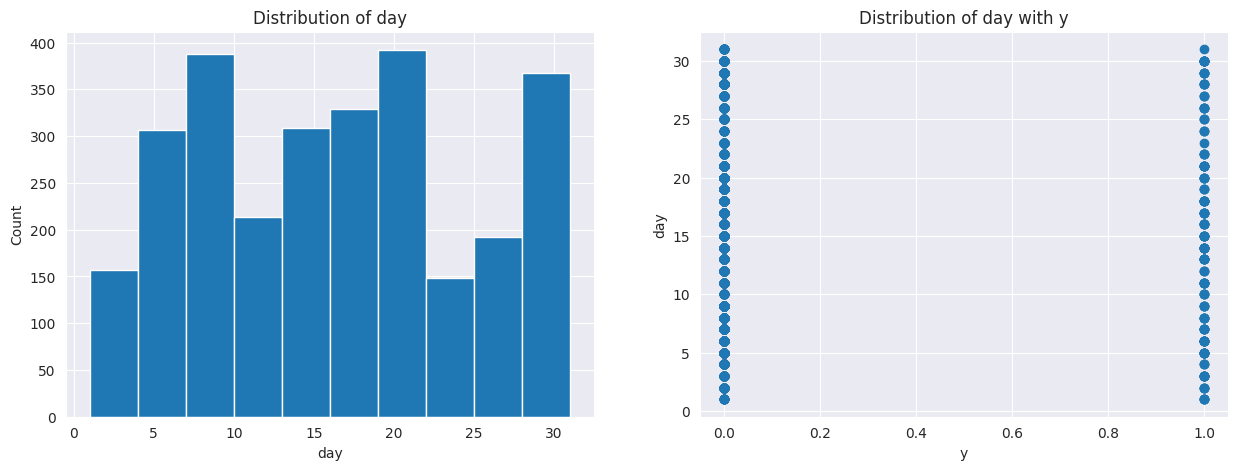

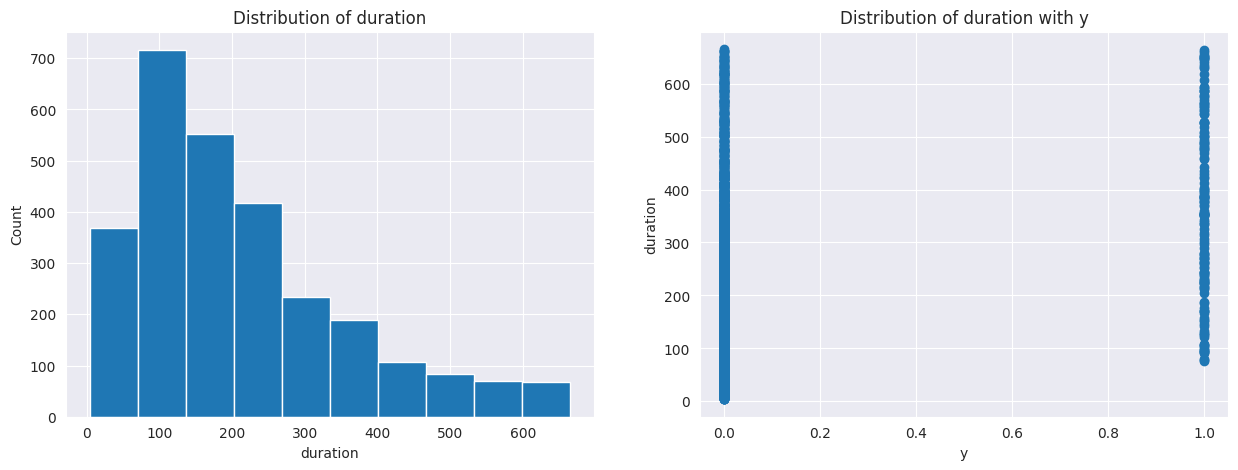

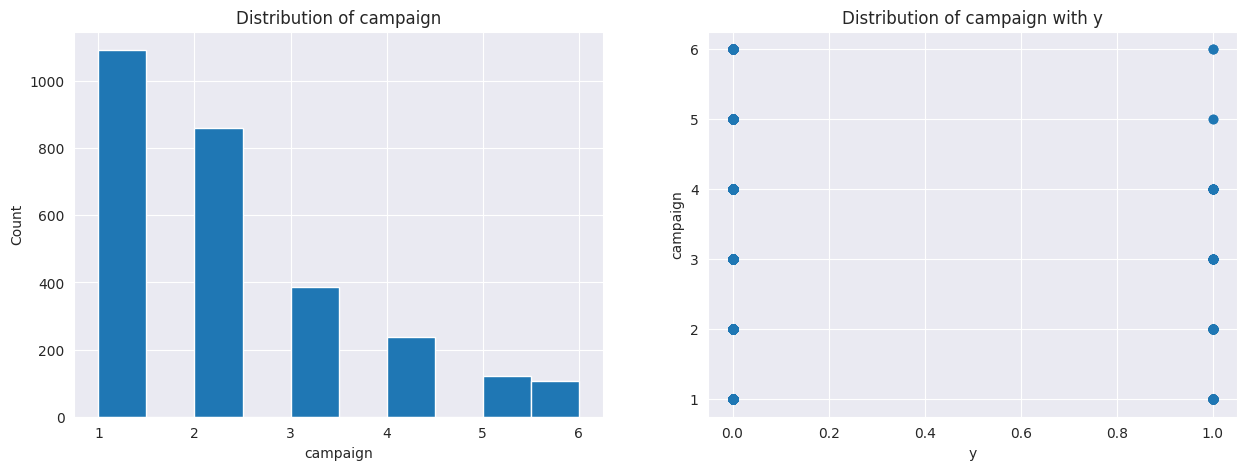

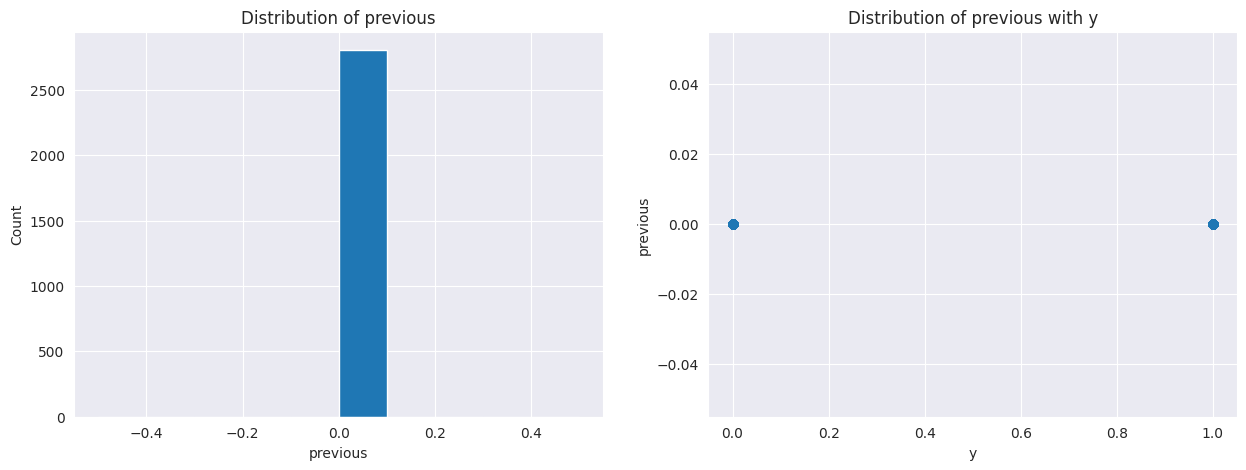

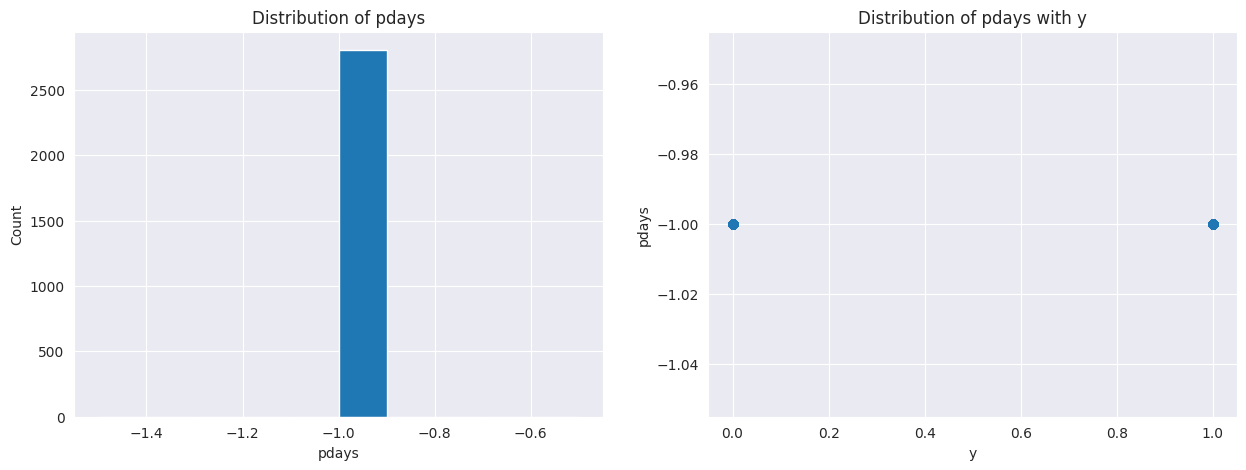

In [35]:
# Plot the features vs y
columns = ['age', 'marital','balance','default', 'housing','loan','day', 'duration', 'campaign',
       'previous' ,'pdays']
for col in columns:
    plt.figure(figsize=(15,5))
    right = plt.subplot(1,2,1)
    plt.hist(df_without_outliers[col])
    right.set_ylabel("Count")
    right.set_xlabel(col)
    right.set_title(f"Distribution of {col}")
    left = plt.subplot(1,2,2)
    plt.scatter(df_without_outliers["y"],df_without_outliers[col])
    left.set_ylabel(col)
    left.set_xlabel("y")
    left.set_title(f"Distribution of {col} with y")
    plt.show()

In [36]:
# Analysing the pdays
df_without_outliers['pdays'].value_counts()


pdays
-1    2803
Name: count, dtype: int64

In [37]:
# Since all pdays have all same values, so it will not affect the output
df_without_outliers.drop("pdays", inplace = True, axis = 1)

In [38]:
df_without_outliers.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,y
0,30,unemployed,1,primary,0,1787,0,0,cellular,19,oct,79,1,0,0
1,30,management,1,tertiary,0,1476,1,1,unknown,3,jun,199,4,0,0
2,59,blue-collar,1,secondary,0,0,1,0,unknown,5,may,226,1,0,0
3,39,technician,1,secondary,0,147,1,0,cellular,6,may,151,2,0,0
4,41,entrepreneur,1,tertiary,0,221,1,0,unknown,14,may,57,2,0,0


In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df_without_outliers[[ 'age', 'marital','default', 'balance', 'housing', 'loan',
       'duration', 'campaign', 'previous']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,VIF,features
0,8.144426,age
1,3.629763,marital
2,1.042136,default
3,1.552755,balance
4,2.070677,housing
5,1.209309,loan
6,2.740346,duration
7,3.306458,campaign
8,NaN,previous


From the vif we can see that all the features are significant except age

## Creating Dummy Variables

### Checkpoint-2

In [40]:
df_dummies = df_without_outliers.copy()

In [41]:
df_dummies = pd.get_dummies(df_dummies,drop_first=True)
df_dummies.head()

,age,marital,default,balance,housing,loan,day,duration,campaign,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,30,1,0,1787,0,0,19,79,1,0,...,False,False,False,False,False,False,False,False,True,False
1,30,1,0,1476,1,1,3,199,4,0,...,False,False,False,False,True,False,False,False,False,False
2,59,1,0,0,1,0,5,226,1,0,...,False,False,False,False,False,False,True,False,False,False
3,39,1,0,147,1,0,6,151,2,0,...,False,False,False,False,False,False,True,False,False,False
4,41,1,0,221,1,0,14,57,2,0,...,False,False,False,False,False,False,True,False,False,False


In [42]:
df_dummies.columns

Index(['age', 'marital', 'default', 'balance', 'housing', 'loan', 'day',
       'duration', 'campaign', 'previous', 'y', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_telephone',
       'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep'],
      dtype='object')

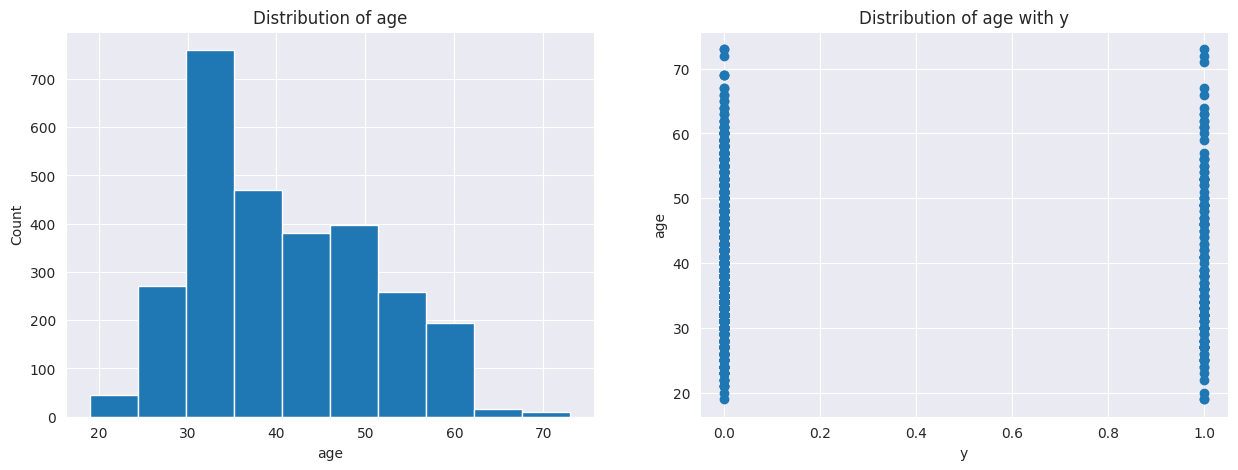

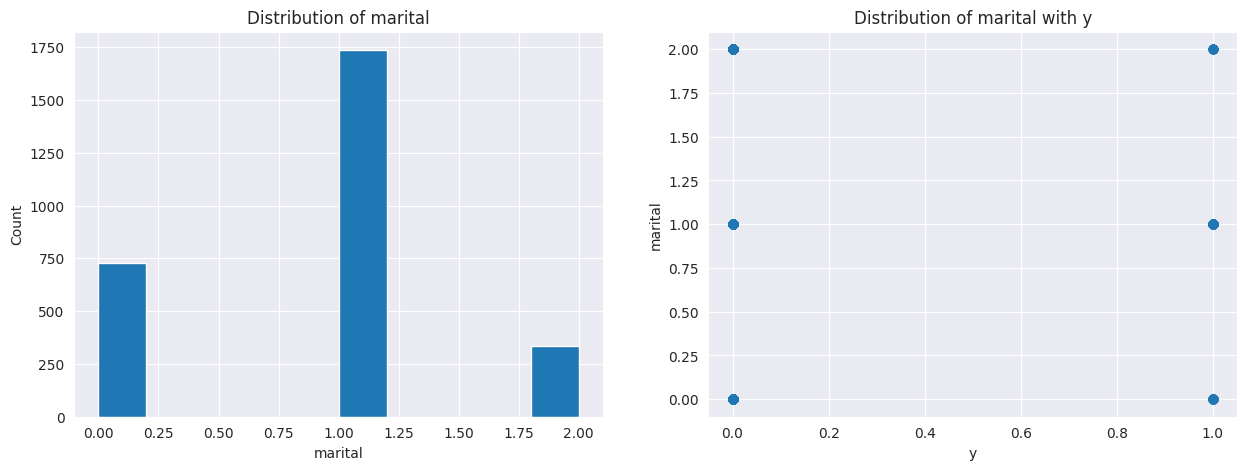

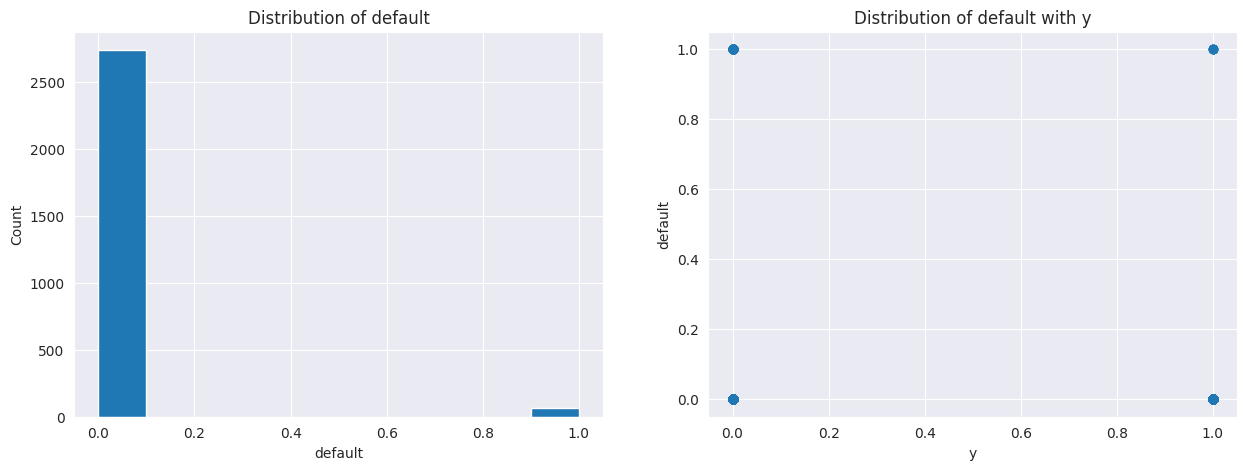

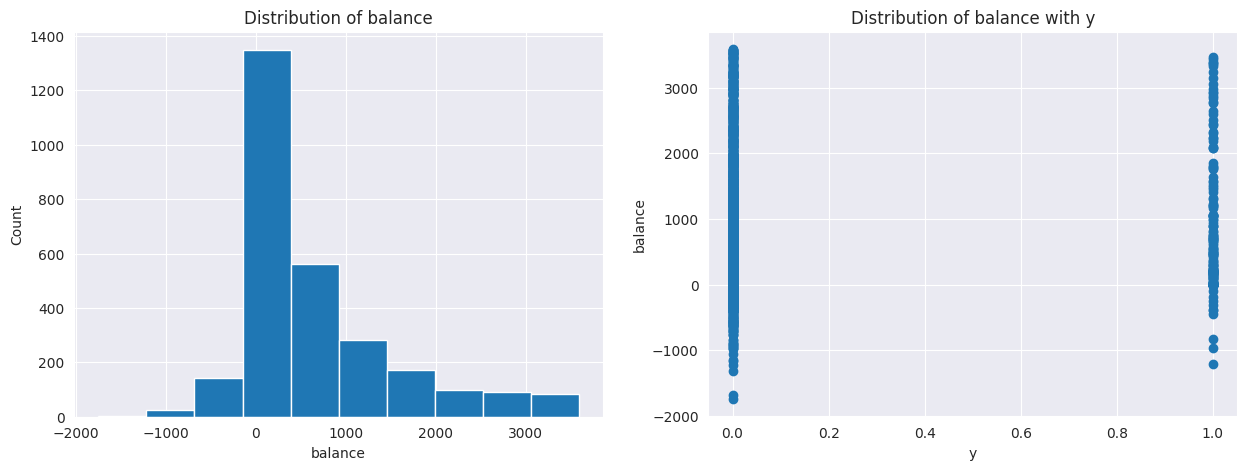

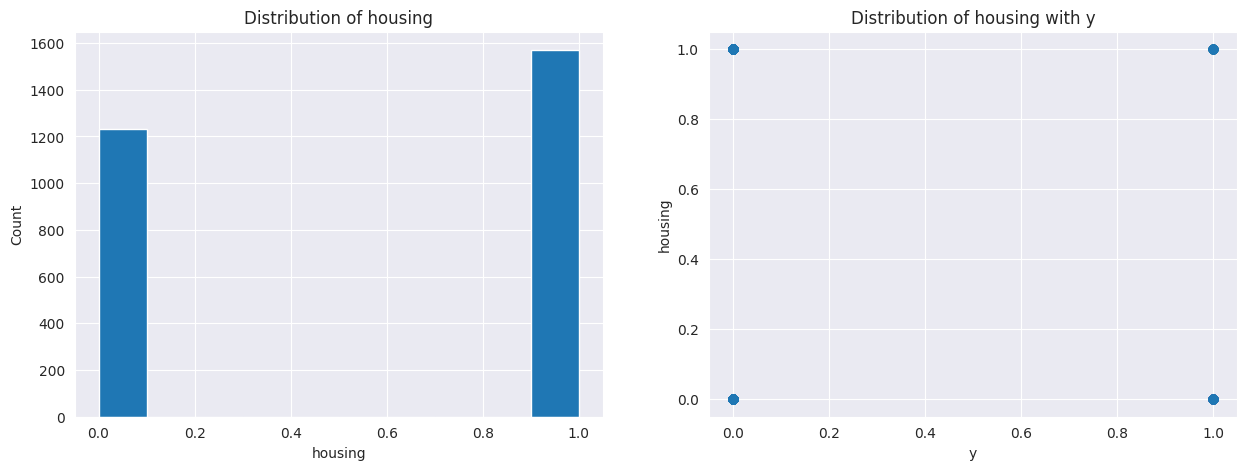

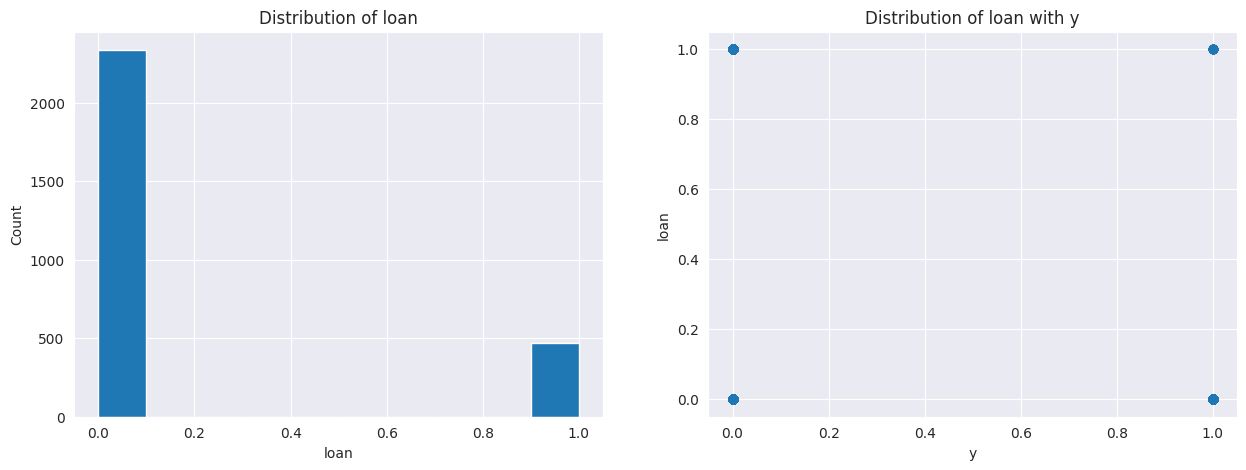

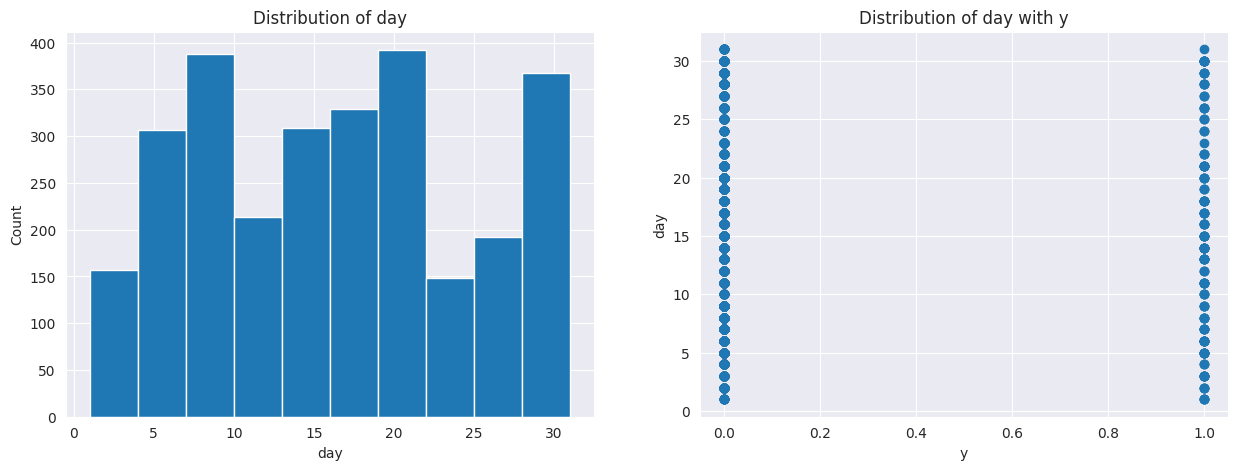

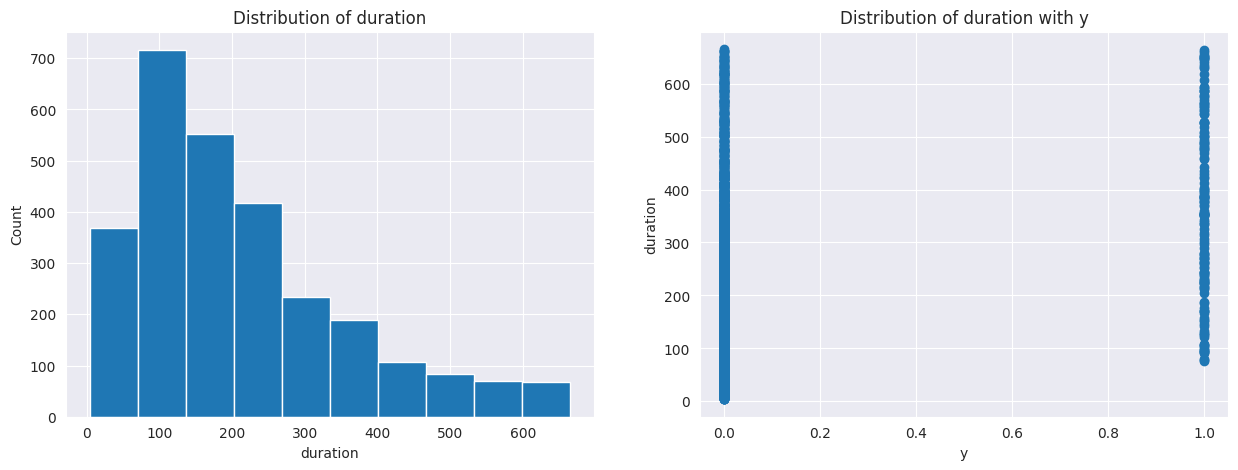

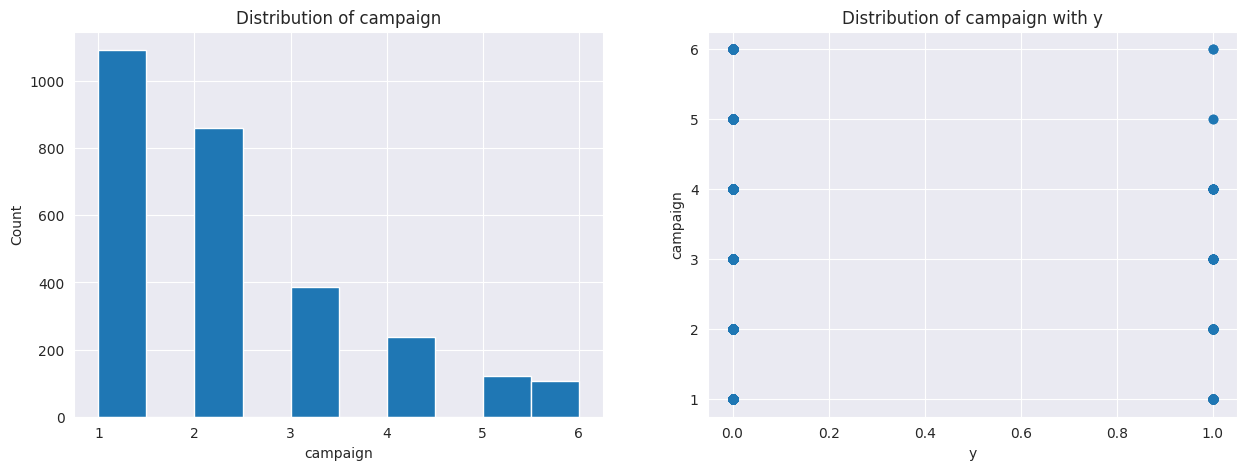

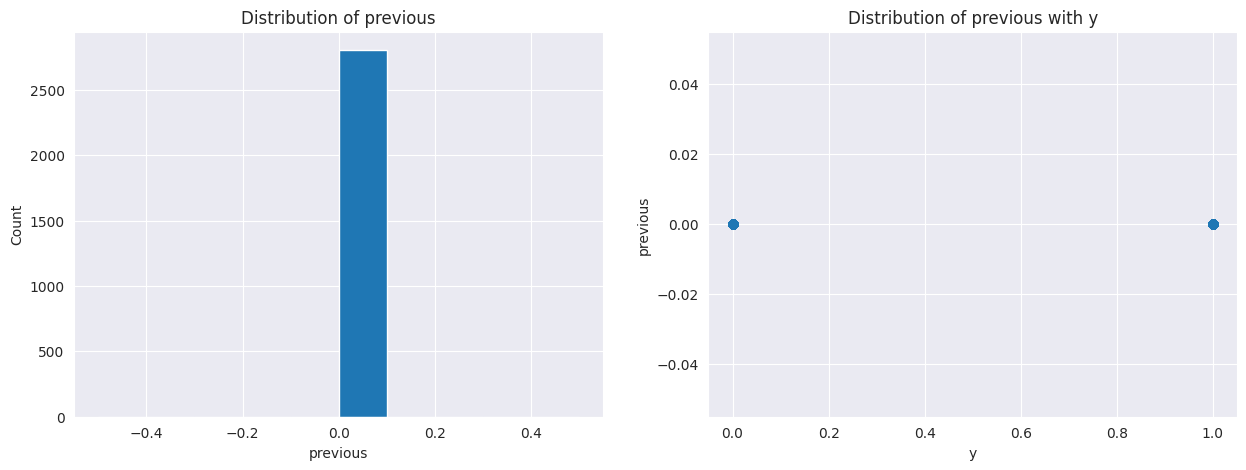

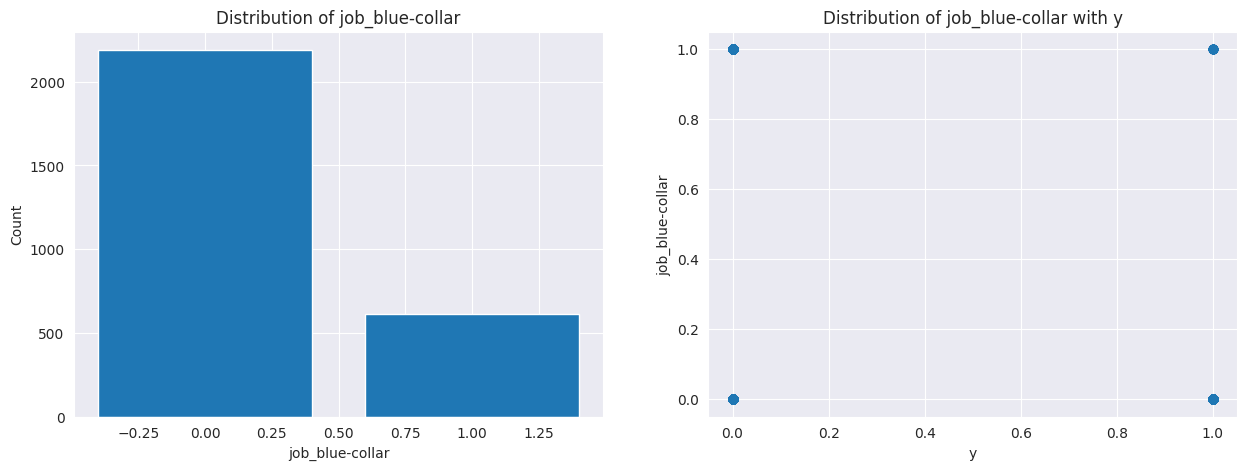

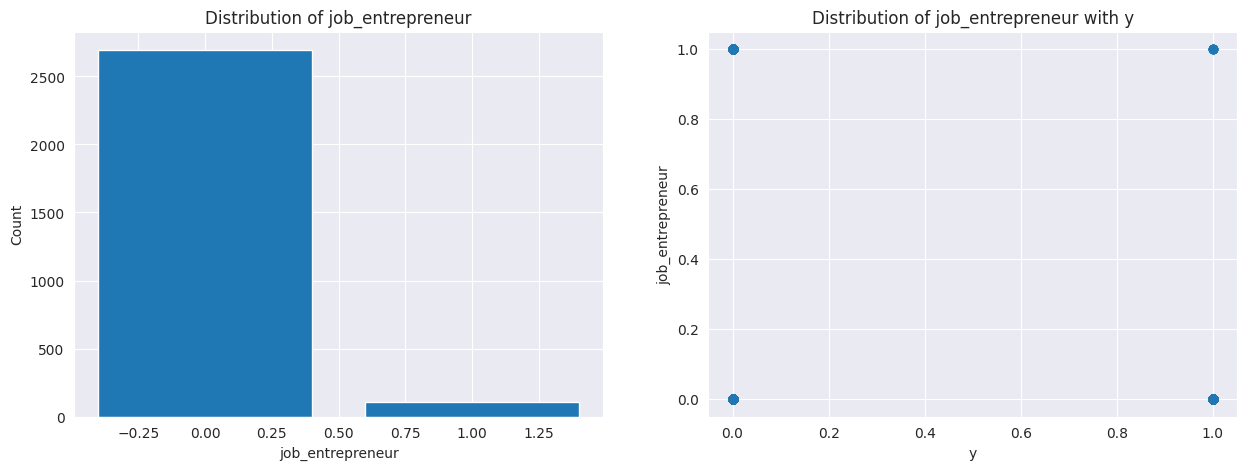

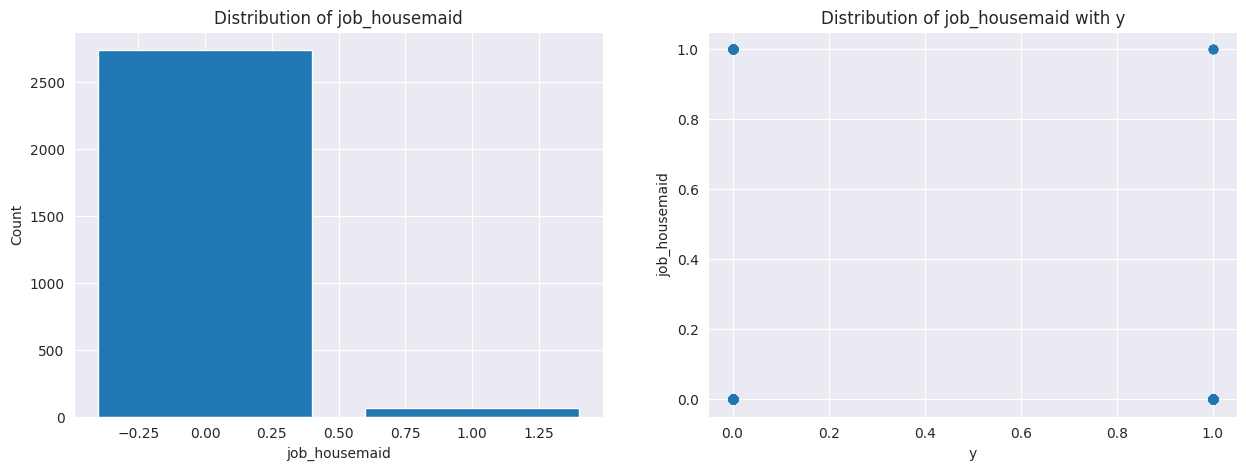

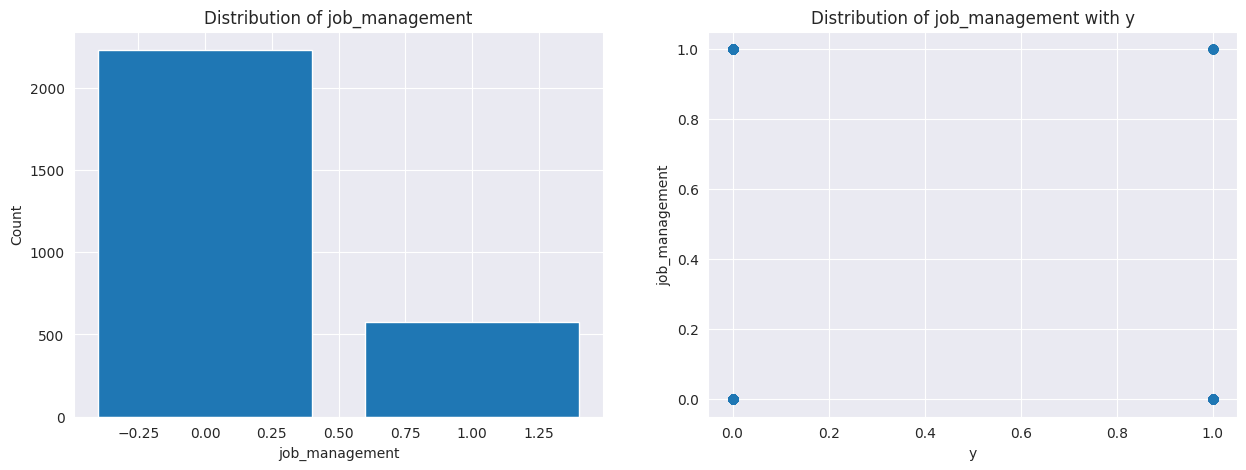

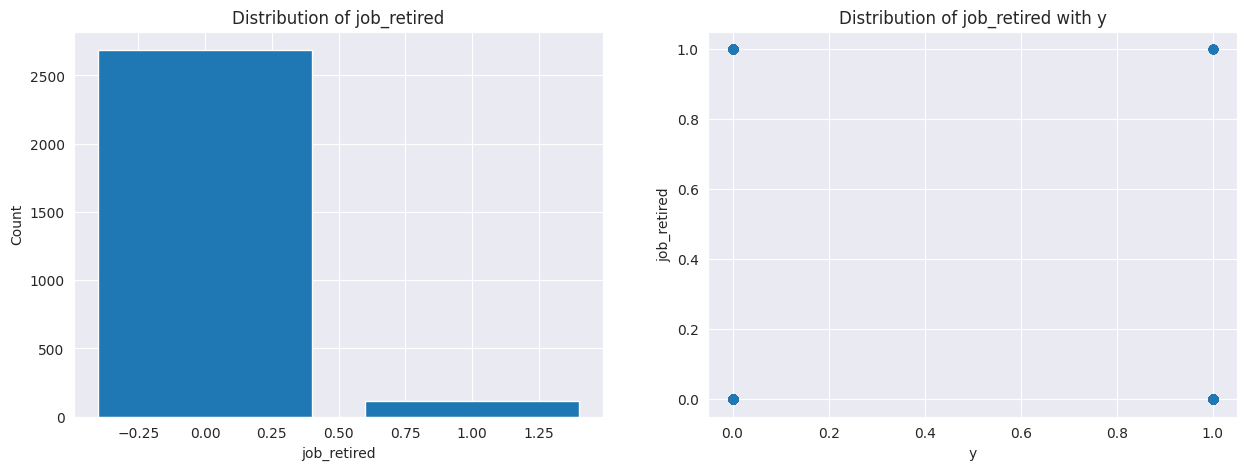

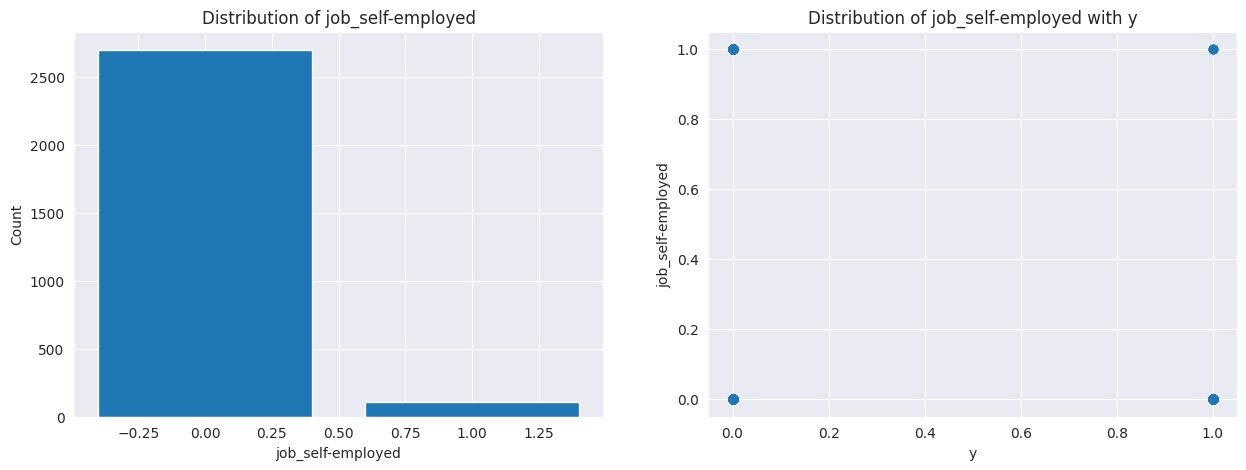

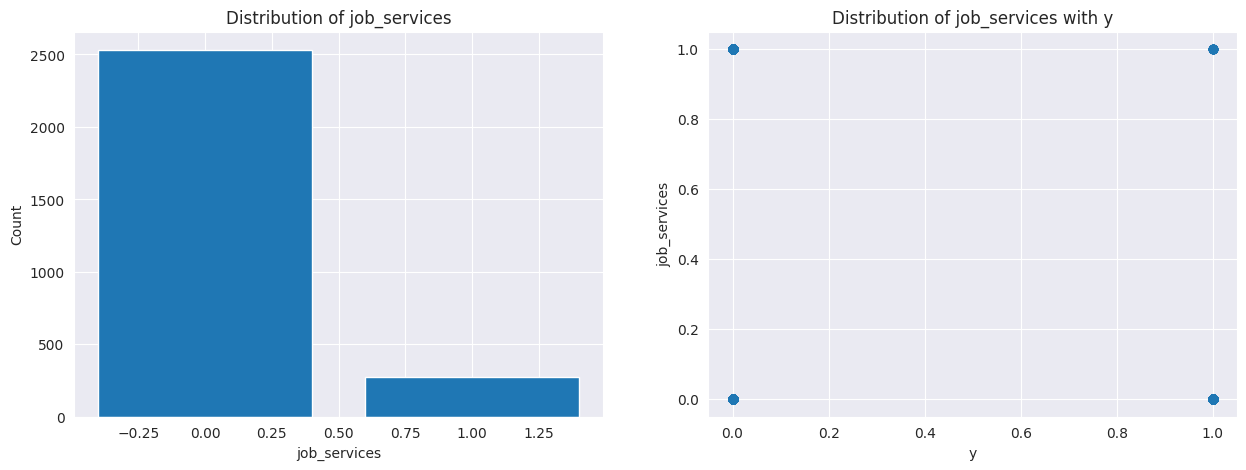

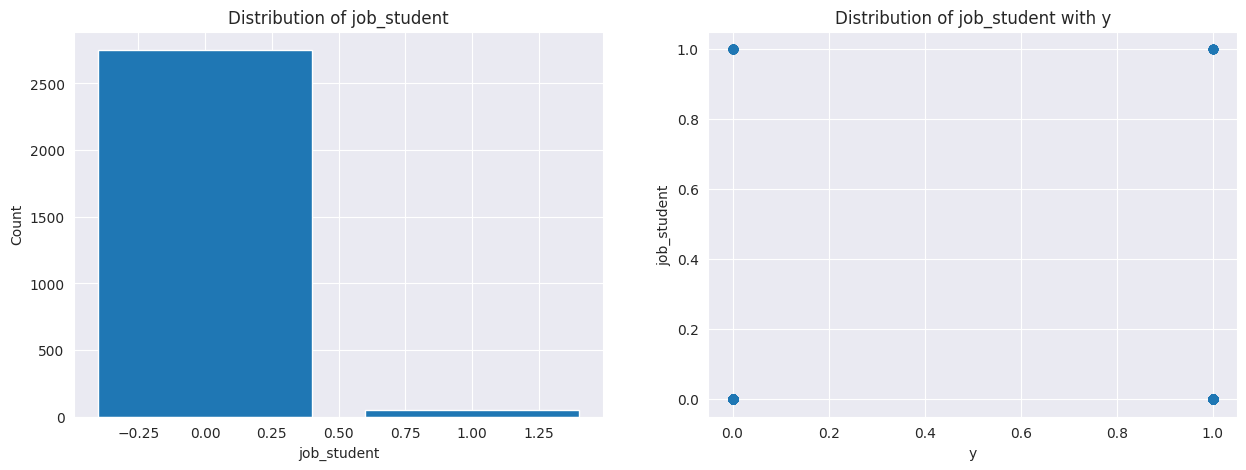

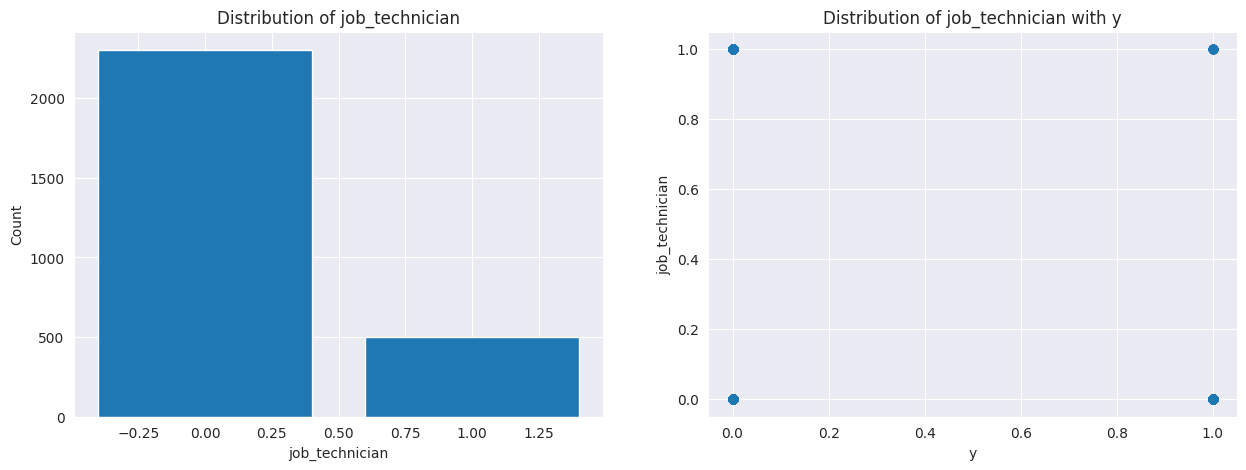

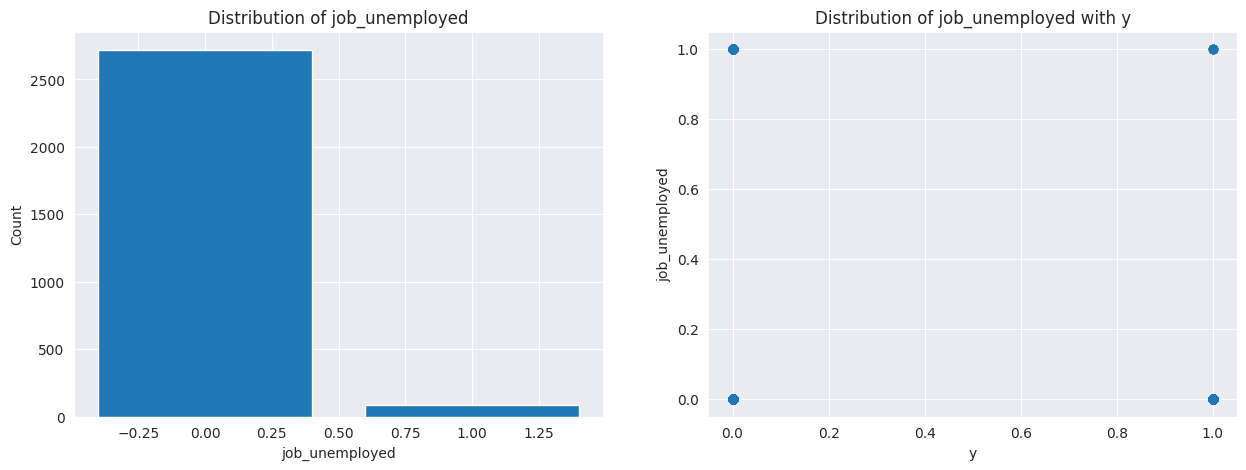

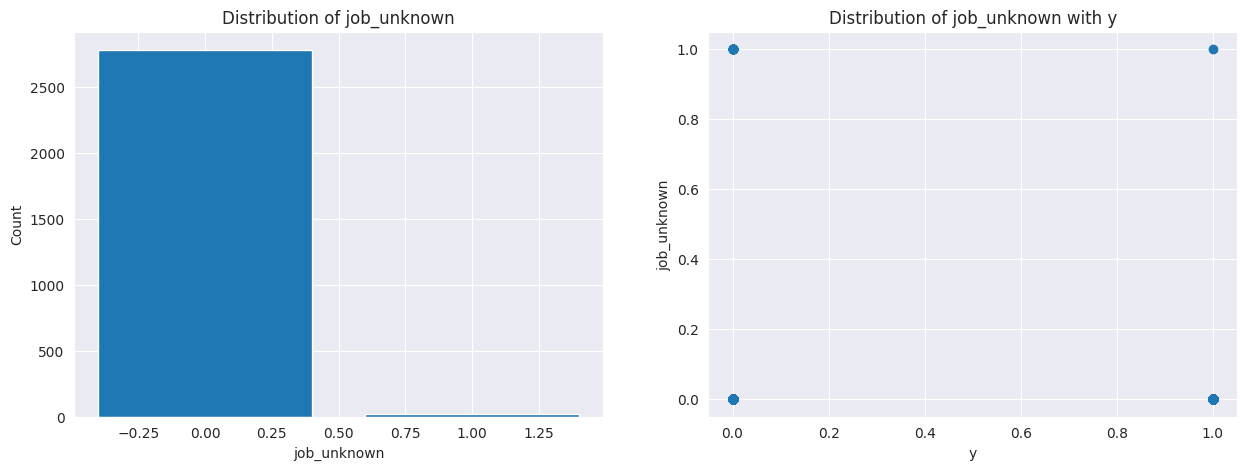

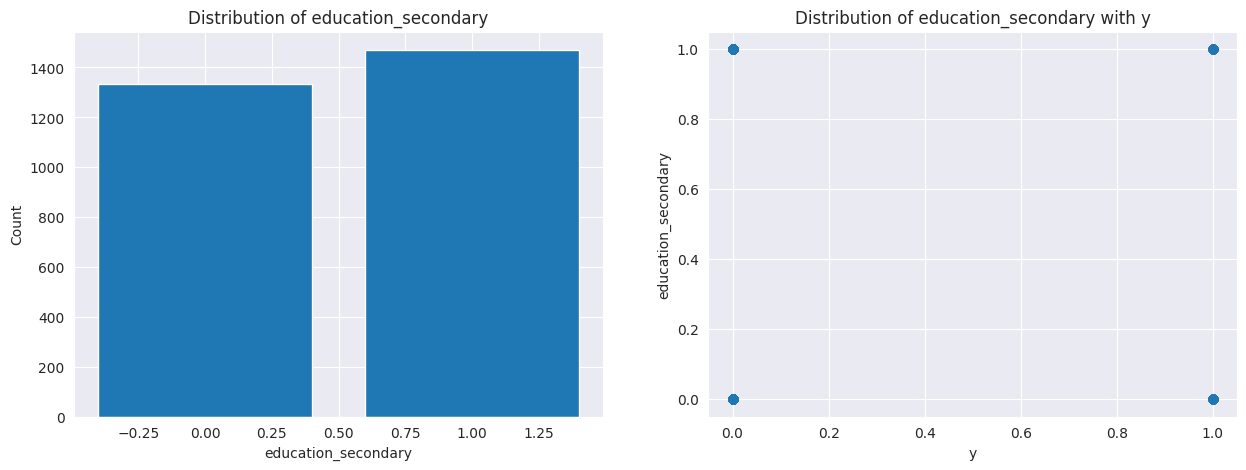

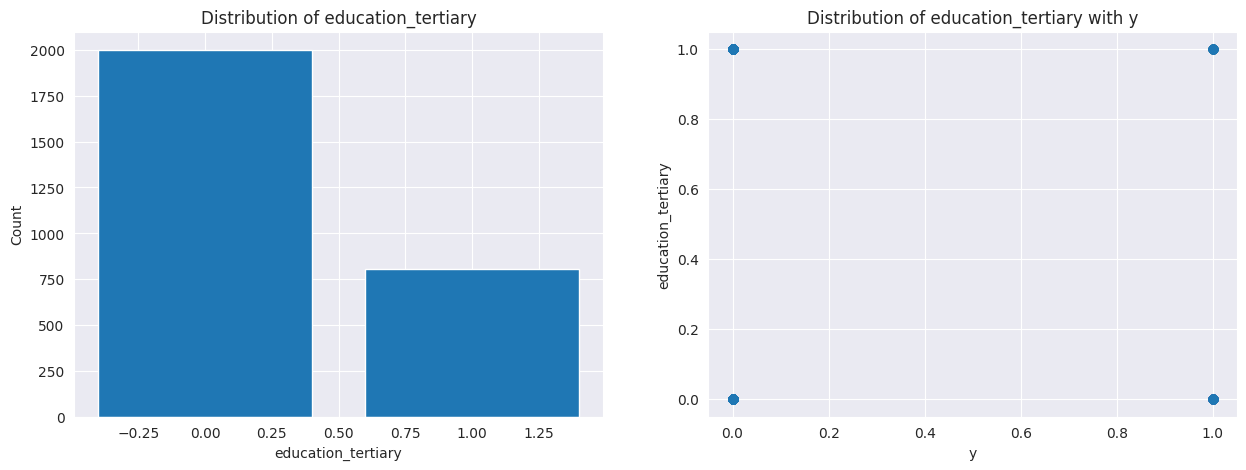

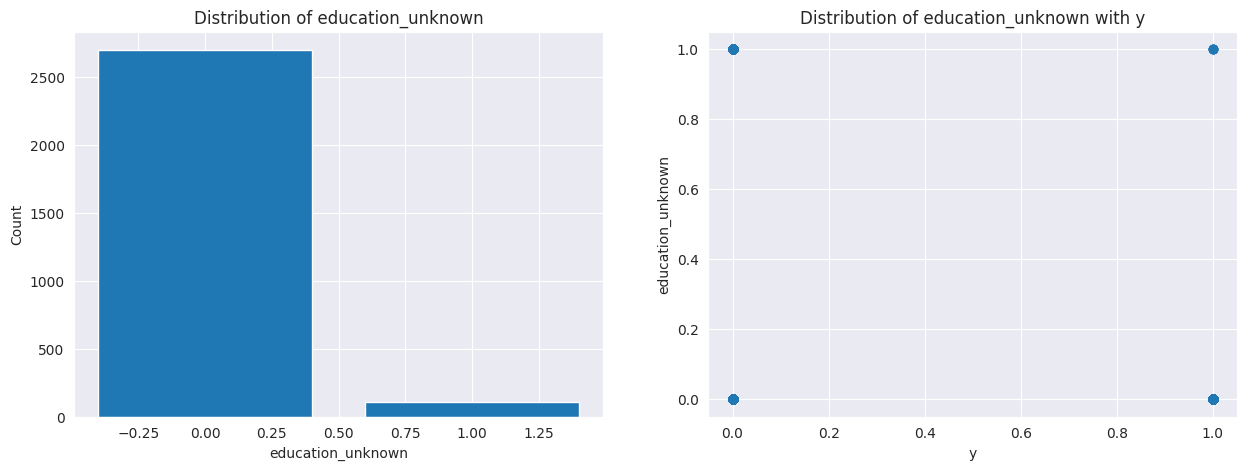

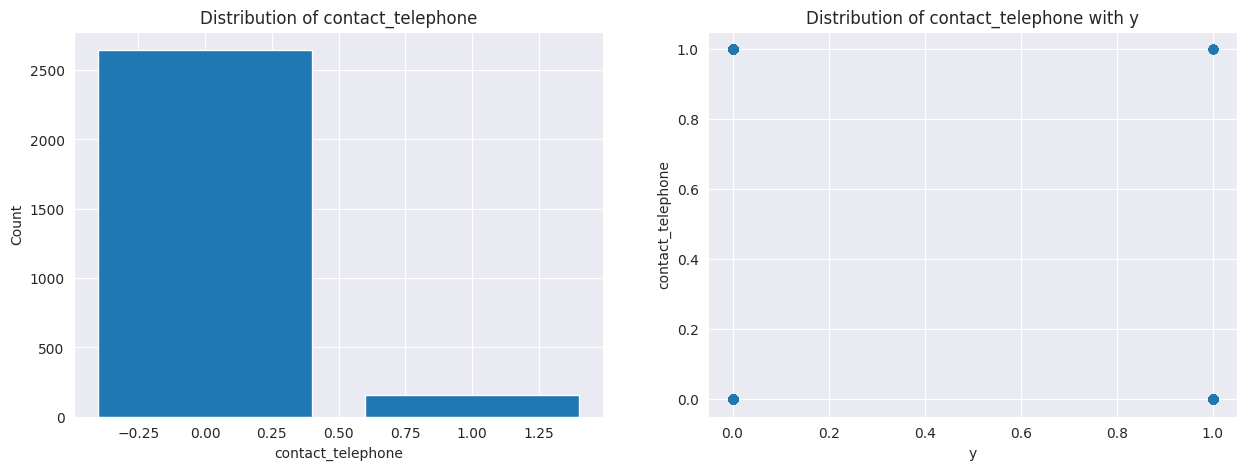

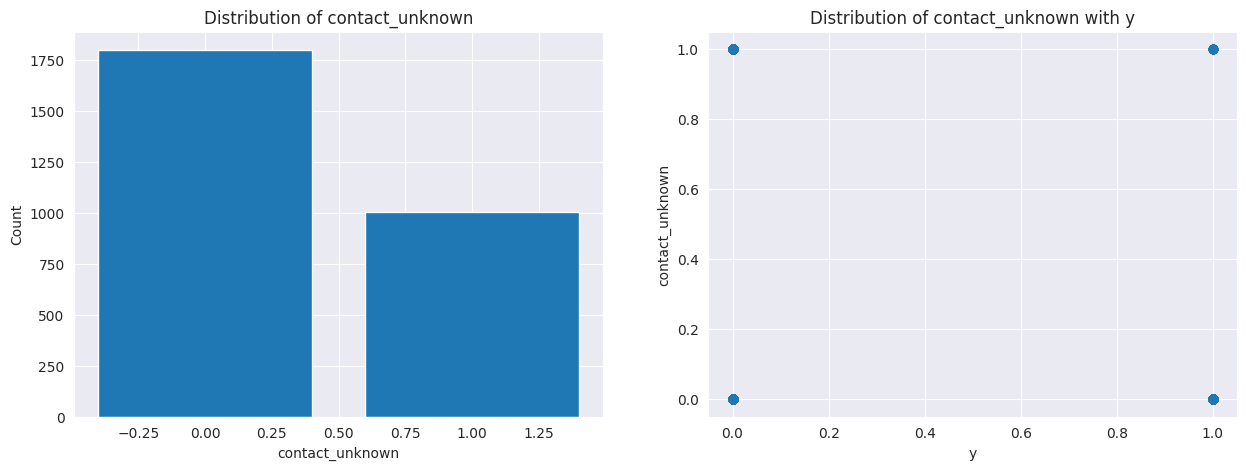

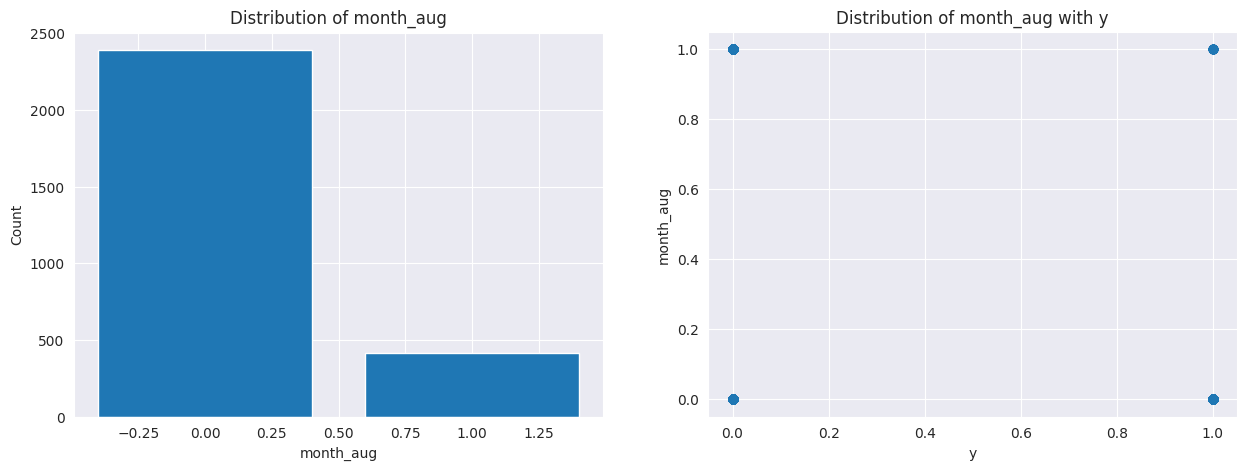

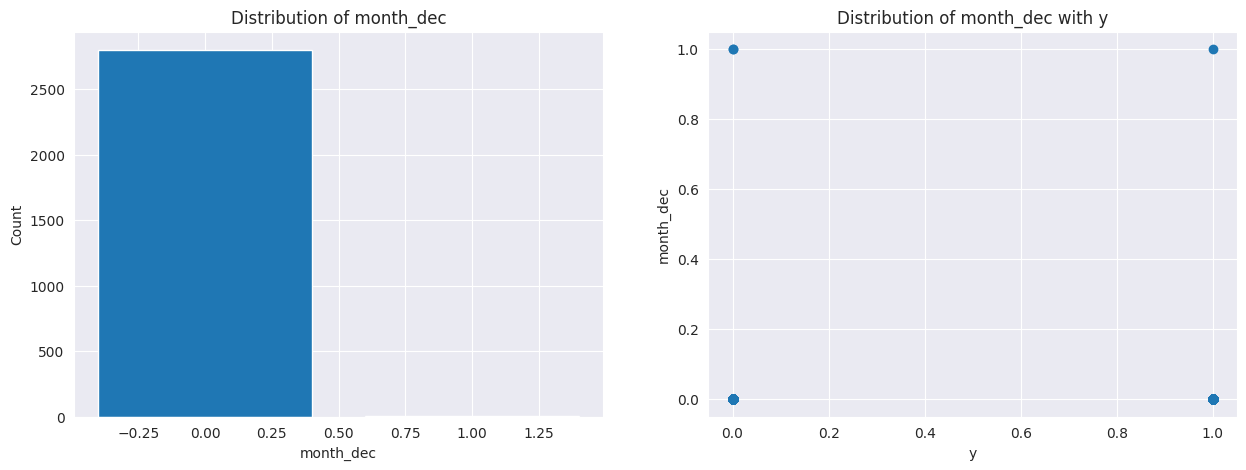

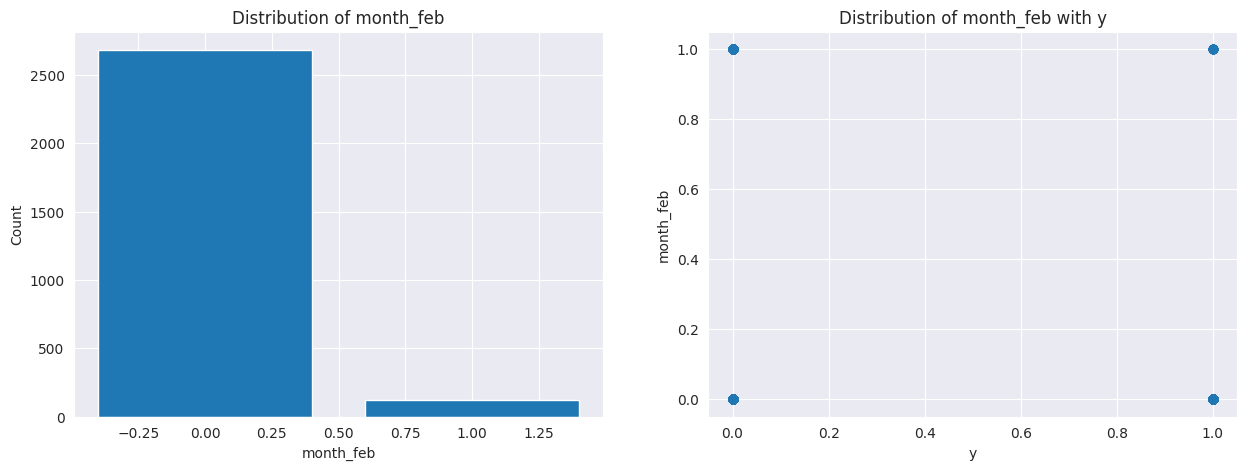

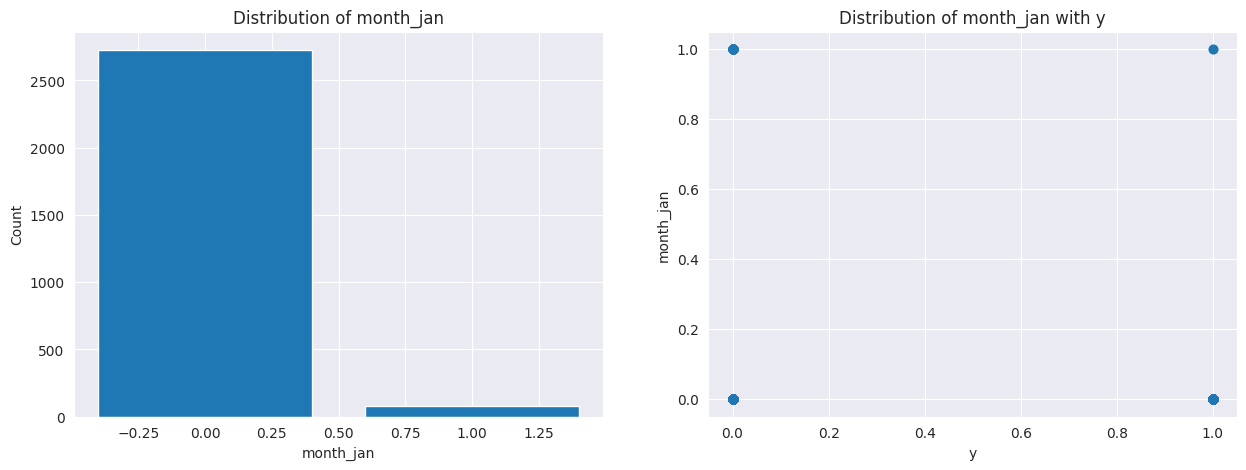

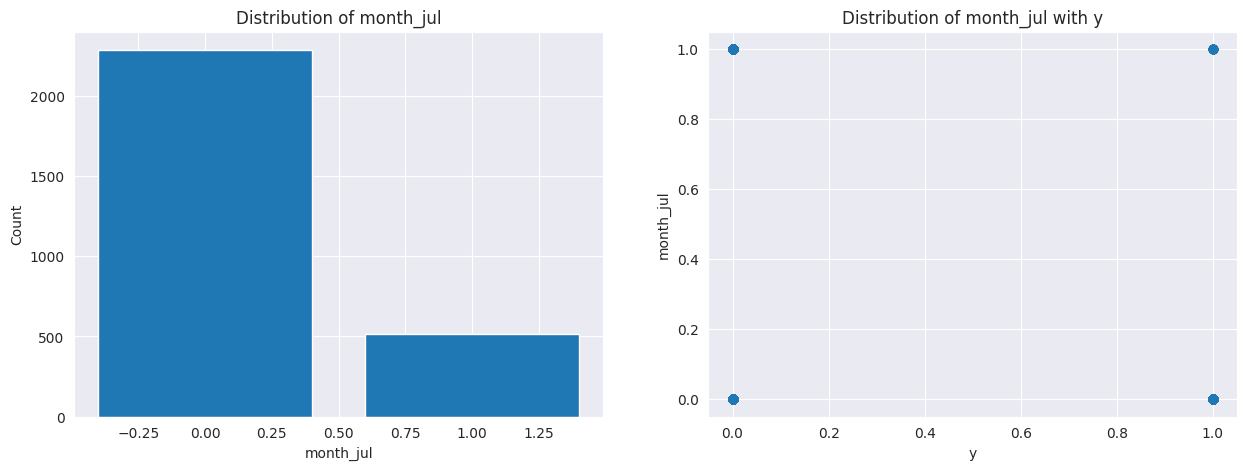

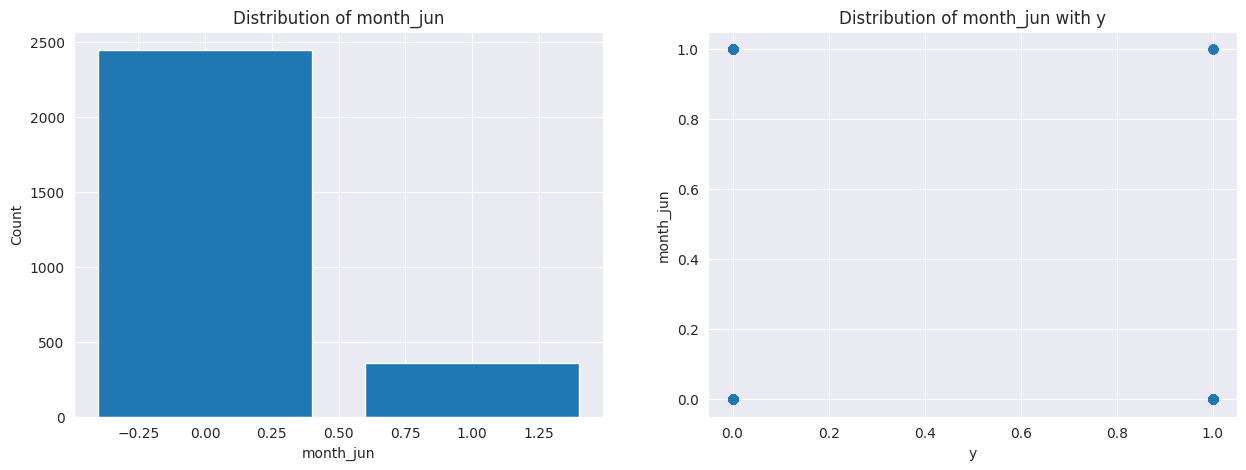

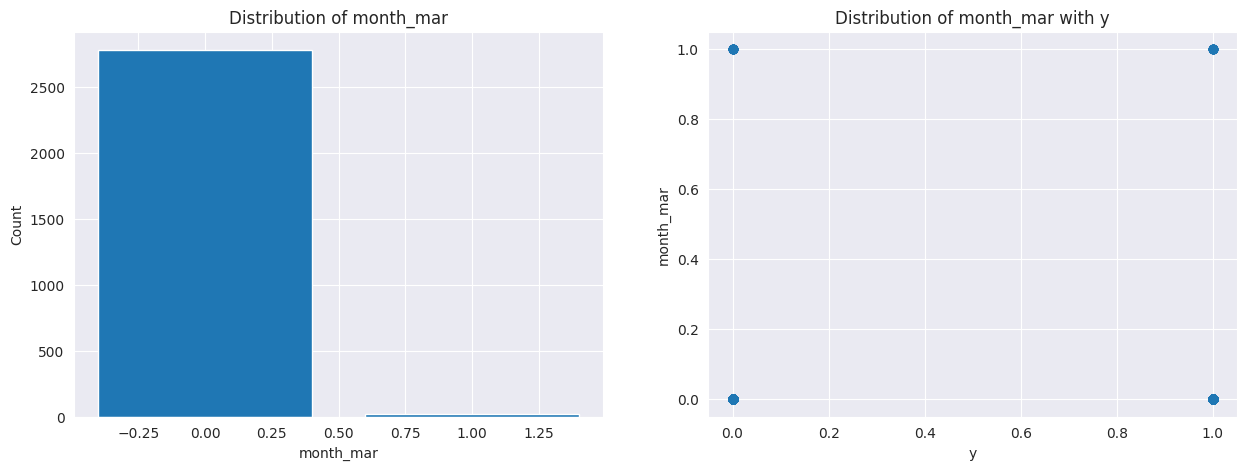

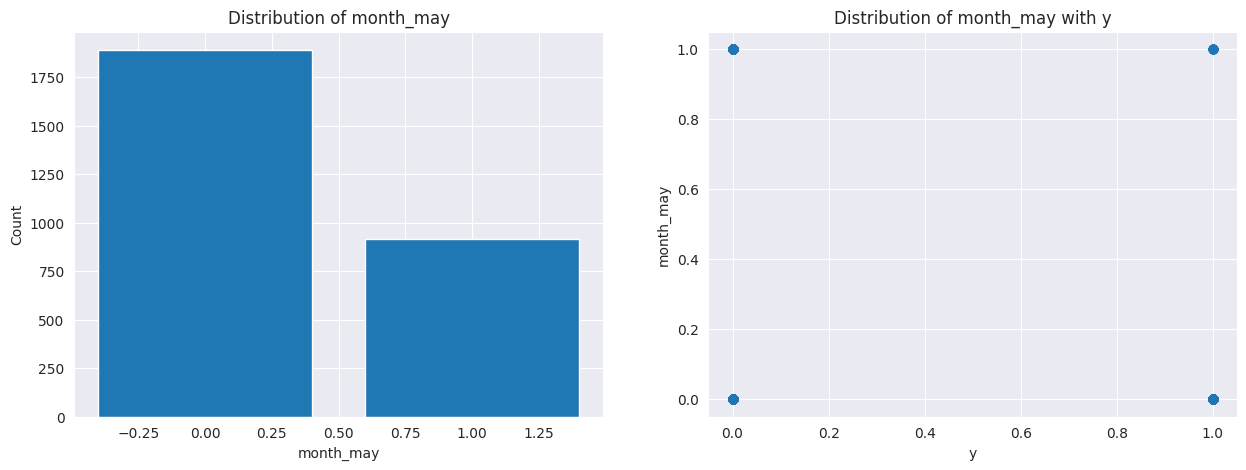

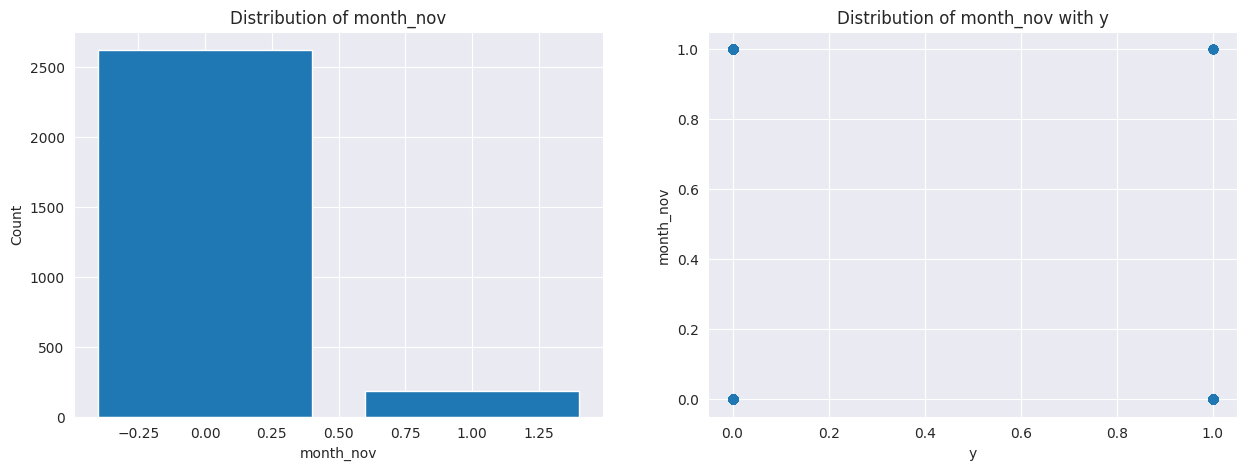

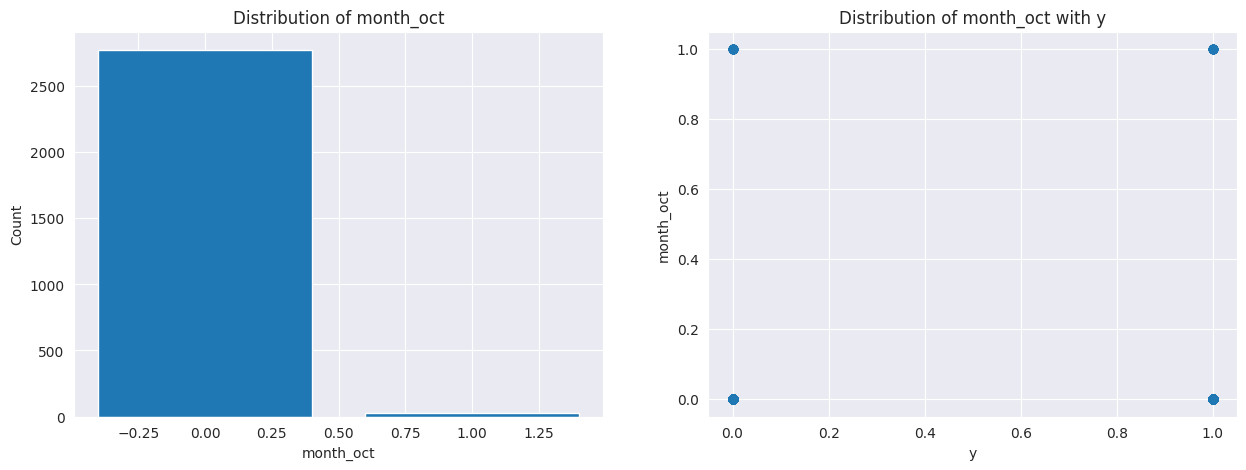

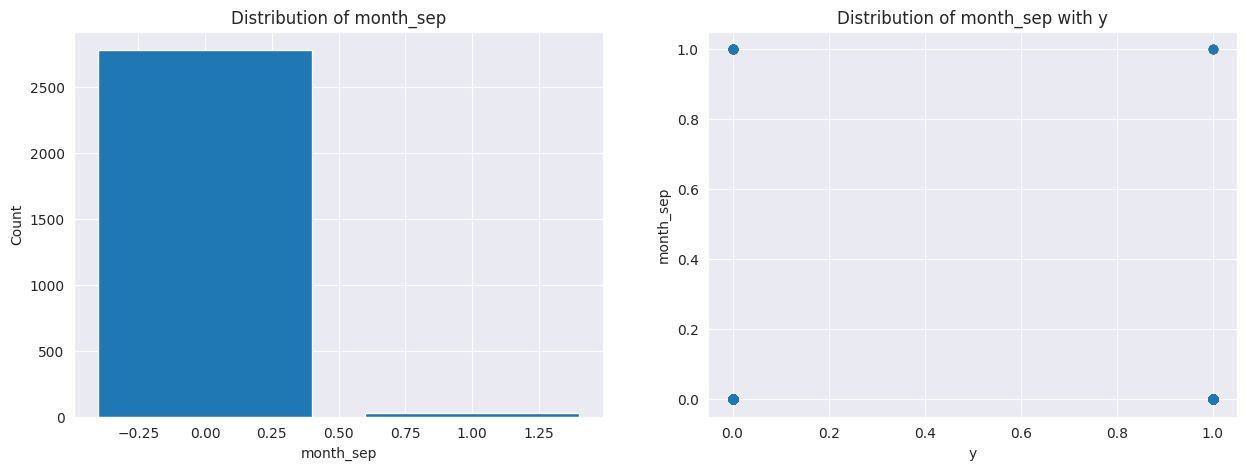

In [43]:
columns = ['age', 'marital', 'default', 'balance', 'housing', 'loan', 'day',
       'duration', 'campaign', 'previous', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_telephone',
       'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep']
for col in columns:
    plt.figure(figsize=(15,5))
    right = plt.subplot(1,2,1)
    if df_dummies[col].dtype != bool: # Check if the column is boolean
        plt.hist(df_dummies[col])
        right.set_ylabel("Count")
        right.set_xlabel(col)
        right.set_title(f"Distribution of {col}")
    else:
        # Handle boolean columns differently, maybe with a bar chart
        value_counts = df_dummies[col].value_counts()
        plt.bar(value_counts.index, value_counts.values)
        right.set_ylabel("Count")
        right.set_xlabel(col)
        right.set_title(f"Distribution of {col}")

    left = plt.subplot(1,2,2)
    plt.scatter(df_dummies["y"],df_dummies[col])
    left.set_ylabel(col)
    left.set_xlabel("y")
    left.set_title(f"Distribution of {col} with y")
    plt.show()

## Feature Scaling (Selectively Scaling the data)

In [44]:
from sklearn.preprocessing import StandardScaler
import re

# select the columns that are dummy variables
dummy_vars = df_dummies.loc[:, df_dummies.columns.str.startswith(('y','job_', 'month_'))]

# select the columns that are not dummy variables
features = df_dummies.loc[:, ~df_dummies.columns.isin(dummy_vars.columns)]

# scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# concatenate the scaled features with the original dummy variables
df_scaled = pd.concat([pd.DataFrame(features_scaled, columns=features.columns), dummy_vars], axis=1)



In [45]:
# Segregating features and target variable

x = df_scaled[['age', 'marital', 'balance', 'housing', 'loan', 'day',
       'duration', 'campaign', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'education_secondary',
       'education_tertiary', 'education_unknown']]
y = df_scaled['y']

### Split the data into train and test set to avoid overfitting

In [46]:

from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=423)

## Logistic Regression Model

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

LR_model = LogisticRegression(C=0.05, solver="liblinear").fit(X_train,y_train)
y_pred= LR_model.predict(X_test)

# Calculate metrics
metrics = {'Accuracy': accuracy_score(y_test, y_pred),
           'Precision': precision_score(y_test, y_pred),
           'Recall': recall_score(y_test, y_pred),
           'F1-score': f1_score(y_test, y_pred),
           'AUC-ROC': roc_auc_score(y_test, y_pred)}

eval_metrics = pd.DataFrame([metrics], columns=metrics.keys())
eval_metrics

,Accuracy,Precision,Recall,F1-score,AUC-ROC
0,0.948108,0.333333,0.021277,0.04,0.509499


## Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

RF_model = RandomForestClassifier().fit(X_train, y_train)
y_pred = RF_model.predict(X_test)

# Calculate metrics
metrics = {'Accuracy': accuracy_score(y_test, y_pred),
           'Precision': precision_score(y_test, y_pred),
           'Recall': recall_score(y_test, y_pred),
           'F1-score': f1_score(y_test, y_pred),
           'AUC-ROC': roc_auc_score(y_test, y_pred)}

eval_metrics = pd.DataFrame([metrics], columns=metrics.keys())
eval_metrics


,Accuracy,Precision,Recall,F1-score,AUC-ROC
0,0.947027,0.375,0.06383,0.109091,0.529068


## Gradient boost

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

GB_model = GradientBoostingClassifier().fit(X_train, y_train)
y_pred = GB_model.predict(X_test)

# Calculate metrics
metrics = {'Accuracy': accuracy_score(y_test, y_pred),
           'Precision': precision_score(y_test, y_pred),
           'Recall': recall_score(y_test, y_pred),
           'F1-score': f1_score(y_test, y_pred),
           'AUC-ROC': roc_auc_score(y_test, y_pred)}

eval_metrics = pd.DataFrame([metrics], columns=metrics.keys())
eval_metrics


,Accuracy,Precision,Recall,F1-score,AUC-ROC
0,0.937297,0.26087,0.12766,0.171429,0.554149


## Hyperparameter Tunning

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the gradient boosting classifier
gbc = GradientBoostingClassifier()

param_grid = {'n_estimators': [100,200, 300],
           'learning_rate': [0.001, 0.01, 0.1, 1],
           'max_depth': [3, 4, 6, 7],
         }


# Create the grid search object
grid_search = GridSearchCV(gbc, param_grid, cv=5,
                           scoring='accuracy', return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300}
Best cross-validation score: 0.94


In [51]:
# Logistic Regression Grid Search

LR_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
           'penalty': ['l1', 'l2'],
           'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
           'max_iter': [100, 200, 300, 400, 500],
           'tol': [1e-4, 1e-3, 1e-2, 1e-1]}


# Initialize the GridSearchCV object
LR_grid_search = GridSearchCV(LogisticRegression(), LR_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
LR_grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: {}".format(LR_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(LR_grid_search.best_score_))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best parameters: {'C': 0.001, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}
Best cross-validation score: 0.94


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
2100 fits failed out of a total of 7000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
700 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: 

In [52]:
# Random Forest Grid Search

RF_grid = {'n_estimators': [100, 200, 300, 400, 500],
           'max_depth': [3, 4, 5, 6, 7],
           'min_samples_split': [2, 3, 4, 5],
           'min_samples_leaf': [1, 2, 3, 4, 5]}

# Initialize the GridSearchCV object
RF_grid_search = GridSearchCV(RandomForestClassifier(), RF_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
RF_grid_search.fit(X_train, y_train)

# Get the best hyperparameters
RF_best_params = RF_grid_search.best_params_

# Print the best parameters and best score
print("Best parameters: {}".format(RF_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(RF_grid_search.best_score_))

Best parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.94


## Plotting Learning Curves

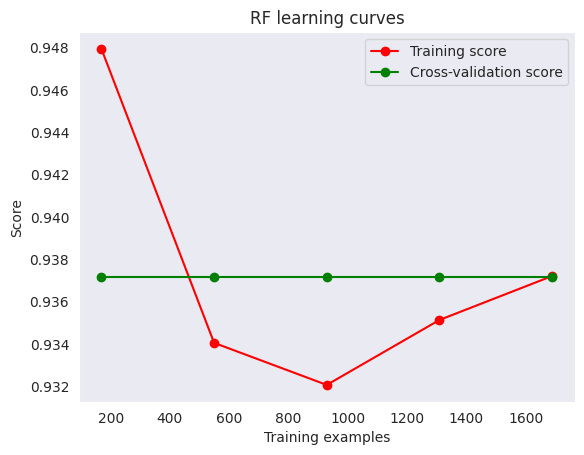

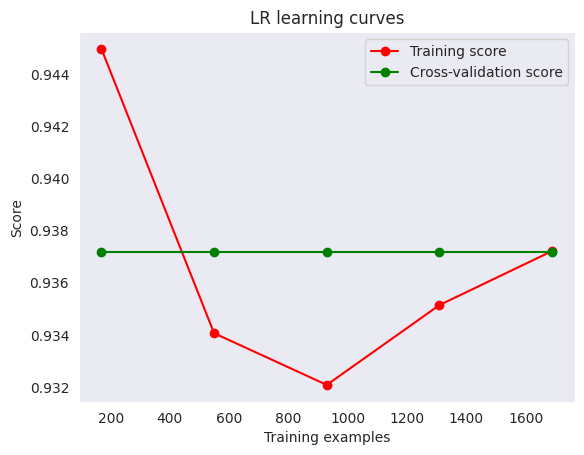

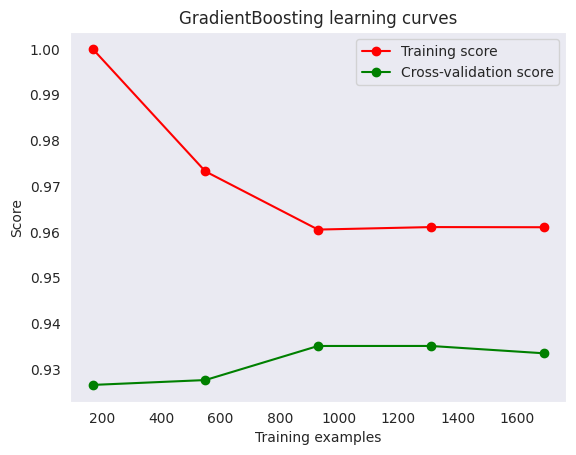

In [53]:
from sklearn.model_selection import learning_curve
# Plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=1, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()


    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(RF_grid_search.best_estimator_,"RF learning curves",X_train,y_train,cv=10)
g = plot_learning_curve(LR_grid_search.best_estimator_,"LR learning curves",X_train,y_train,cv=10)
g = plot_learning_curve(grid_search.best_estimator_,"GradientBoosting learning curves",X_train,y_train,cv=10)


In [54]:
# Define the gradient boosting classifier
gbc = GradientBoostingClassifier(learning_rate= 0.01, max_depth= 4, n_estimators= 300)

# Fit the grid search to the data
gbc.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=300)

In [55]:
from sklearn.metrics import accuracy_score, precision_recall_curve,classification_report,roc_curve, confusion_matrix
y_pred = gbc.predict(X_test)
acc_train = accuracy_score(y_test,y_pred)
class_re = classification_report(y_test,y_pred)
con_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",con_mat)
print("\n")
print("The accuracy of the model:",(acc_train)*100)
print("\n")
print("The classification report:\n",class_re)


Confusion Matrix:
 [[863  15]
 [ 42   5]]


The accuracy of the model: 93.83783783783784


The classification report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       878
           1       0.25      0.11      0.15        47

    accuracy                           0.94       925
   macro avg       0.60      0.54      0.56       925
weighted avg       0.92      0.94      0.93       925



In [56]:
roc_auc_score(y_test,y_pred)

0.5446493481316338

In [57]:
lr = LogisticRegression(C= 1, max_iter= 100, penalty= 'l2', solver= 'sag', tol= 0.1)

# Fit the grid search to the data
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
acc_train = accuracy_score(y_test,y_pred)
class_re = classification_report(y_test,y_pred)
con_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",con_mat)
print("\n")
print("The accuracy of the model:",(acc_train)*100)
print("\n")
print("The classification report:\n",class_re)

Confusion Matrix:
 [[868  10]
 [ 45   2]]


The accuracy of the model: 94.05405405405406


The classification report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       878
           1       0.17      0.04      0.07        47

    accuracy                           0.94       925
   macro avg       0.56      0.52      0.52       925
weighted avg       0.91      0.94      0.92       925



In [58]:
roc_auc_score(y_test,y_pred)

0.5155818349246354

In [59]:
rf = RandomForestClassifier(max_depth= 3, n_estimators= 100,min_samples_leaf = 1, min_samples_split = 2)

# Fit the grid search to the data
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
acc_train = accuracy_score(y_test,y_pred)
class_re = classification_report(y_test,y_pred)
con_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",con_mat)
print("\n")
print("The accuracy of the model:",(acc_train)*100)
print("\n")
print("The classification report:\n",class_re)

Confusion Matrix:
 [[878   0]
 [ 47   0]]


The accuracy of the model: 94.91891891891892


The classification report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       878
           1       0.00      0.00      0.00        47

    accuracy                           0.95       925
   macro avg       0.47      0.50      0.49       925
weighted avg       0.90      0.95      0.92       925



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
roc_auc_score(y_test,y_pred)

0.5

### From the above result we can observe that Gradient Boosting Algorithm works best while rest to try to overfit the data

## Test the Model on Test Set


In [61]:
test_dummies = test.copy()
test_dummies.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown
1,2,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown
2,3,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown
3,4,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown
4,5,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown


In [62]:
test_dummies["marital"]=test_dummies["marital"].map({'single':0, 'married':1, 'divorced':2})
test_dummies["default"]=test_dummies["default"].map({'no':0, 'yes':1})
test_dummies["housing"]=test_dummies["housing"].map({'no':0, 'yes':1})
test_dummies["loan"]=test_dummies["loan"].map({'no':0, 'yes':1})

test_dummies = pd.get_dummies(test_dummies,drop_first=True)


In [63]:
# Scale the data

# select the columns that are dummy variables
dummy_vars = test_dummies.loc[:, test_dummies.columns.str.startswith(('Id','job_', 'education_'))]

# # select the columns that are not dummy variables
features = test_dummies.loc[:, ~test_dummies.columns.isin(dummy_vars.columns)]

# # scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# # concatenate the scaled features with the original dummy variables
test_scaled = pd.concat([pd.DataFrame(features_scaled, columns=features.columns), dummy_vars], axis=1)

In [64]:
x_test = test_dummies[['age', 'marital', 'balance', 'housing', 'loan', 'day',
       'duration', 'campaign', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'education_secondary',
       'education_tertiary', 'education_unknown']]


### Testing using Gradient Boost Classifier

In [65]:
predictions = gbc.predict(x_test)

# Creating dataframe of predictions
pred_report = pd.DataFrame(predictions.tolist(),index = [i for i in range(len(predictions))],columns=["client will subscribe a term deposit"])
pred_report.index.name = 'ID'

In [66]:
# saving the prediction
pred_report.to_csv("final_submission.csv")